In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity 
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import preprocessing

In [2]:
fighters = pd.read_csv(r'C:\Users\akars\Downloads\fighterdata.csv')
eventslist=pd.read_csv(r'C:\Users\akars\Downloads\UFCeventslist.csv')

In [3]:
fighters

,First,Last,Nickname,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),...,Draw,Links,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min
0,Tom,Aaron,NaN,Tom Aaron,USA,Lightweight,43,0.00,155,0.00,...,0,http://ufcstats.com/fighter-details/93fe7332d1...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,Danny,Abbadi,The Assassin,Danny Abbadi,RUS,Lightweight,38,180.34,155,0.00,...,0,http://ufcstats.com/fighter-details/15df64c02b...,3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0
2,David,Abbott,Tank,David Abbott,USA,Heavyweight,0,182.88,265,0.00,...,0,http://ufcstats.com/fighter-details/b361180739...,1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0
3,Shamil,Abdurakhimov,Abrek,Shamil Abdurakhimov,RUS,Heavyweight,40,190.50,235,193.04,...,0,http://ufcstats.com/fighter-details/2f5cbecbbe...,2.45,0.44,2.45,0.58,1.23,0.24,0.47,0.2
4,Hiroyuki,Abe,Abe Ani,Hiroyuki Abe,JPN,Lightweight,0,167.64,145,0.00,...,3,http://ufcstats.com/fighter-details/c0ed7b2081...,1.71,0.36,3.11,0.63,0.00,0.00,0.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,Dave,Zitanick,NaN,Dave Zitanick,POL,Welterweight,41,0.00,170,0.00,...,0,http://ufcstats.com/fighter-details/be124bdd60...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3584,Alex,Zuniga,NaN,Alex Zuniga,USA,Featherweight,0,0.00,145,0.00,...,0,http://ufcstats.com/fighter-details/02d808afb9...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3585,George,Zuniga,NaN,George Zuniga,CRC,Middleweight,0,175.26,185,0.00,...,0,http://ufcstats.com/fighter-details/1291dd6b8a...,7.64,0.38,5.45,0.37,0.00,0.00,1.00,0.0
3586,Allan,Zuniga,Tigre,Allan Zuniga,CRC,Lightweight,29,170.18,155,177.80,...,0,http://ufcstats.com/fighter-details/523af801b3...,3.93,0.52,1.80,0.61,0.00,0.00,0.57,1.0


In [4]:
fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 23 columns):
First                       3588 non-null object
Last                        3588 non-null object
Nickname                    1899 non-null object
fighter_name                3588 non-null object
country                     3588 non-null object
weight_class                3532 non-null object
age                         3588 non-null int64
Ht(cm)                      3588 non-null float64
Wt(lbs)                     3588 non-null int64
Reach (cm)                  3588 non-null float64
Stance                      2780 non-null object
Win                         3588 non-null int64
Loss                        3588 non-null int64
Draw                        3588 non-null int64
Links                       3588 non-null object
sigstrikes_landed_permin    3588 non-null float64
strike_acc                  3588 non-null float64
sigstrikes_abs_permin       3588 non-null float64
sigstrikes_

In [5]:
fighters.isnull().sum()

First                          0
Last                           0
Nickname                    1689
fighter_name                   0
country                        0
weight_class                  56
age                            0
Ht(cm)                         0
Wt(lbs)                        0
Reach (cm)                     0
Stance                       808
Win                            0
Loss                           0
Draw                           0
Links                          0
sigstrikes_landed_permin       0
strike_acc                     0
sigstrikes_abs_permin          0
sigstrikes_def                 0
takedown_avg_per15min          0
takedown_acc                   0
takedown_def                   0
avg_sub_per15min               0
dtype: int64

In [6]:
fighters.describe()

,age,Ht(cm),Wt(lbs),Reach (cm),Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min
count,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,29.642140,165.572179,169.523133,85.235831,12.299052,5.829710,0.279264,2.281446,0.344693,2.979370,0.423055,1.209763,0.259476,0.376600,0.647046
std,16.380227,47.240126,46.652626,91.340566,9.699731,5.267501,0.861495,1.902177,0.207518,2.821334,0.231389,1.916884,0.292725,0.346695,1.643022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,170.180000,145.000000,0.000000,6.000000,2.000000,0.000000,0.690000,0.250000,1.367500,0.340000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,177.800000,170.000000,0.000000,11.000000,5.000000,0.000000,2.160000,0.400000,2.740000,0.500000,0.505000,0.200000,0.400000,0.000000
75%,40.000000,182.880000,185.000000,182.880000,17.000000,8.000000,0.000000,3.430000,0.480000,4.000000,0.580000,1.880000,0.450000,0.660000,0.800000
max,78.000000,226.060000,770.000000,213.360000,253.000000,83.000000,11.000000,17.650000,1.000000,52.500000,1.000000,32.140000,1.000000,1.000000,29.000000


In [7]:
fighters.iloc[:,15:]

,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0
2,1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0
3,2.45,0.44,2.45,0.58,1.23,0.24,0.47,0.2
4,1.71,0.36,3.11,0.63,0.00,0.00,0.33,0.0
...,...,...,...,...,...,...,...,...
3583,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3584,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3585,7.64,0.38,5.45,0.37,0.00,0.00,1.00,0.0
3586,3.93,0.52,1.80,0.61,0.00,0.00,0.57,1.0


In [8]:
fighters[(fighters['sigstrikes_landed_permin']==0) & (fighters['strike_acc']==0) & (fighters['sigstrikes_abs_permin']==0) & (fighters['sigstrikes_def']==0) & (fighters['takedown_avg_per15min']==0) & (fighters['takedown_acc']==0) & (fighters['takedown_def']==0) & (fighters['avg_sub_per15min']==0)]
# 640 datapoints with all statistic values as 0. Lets take them out.

,First,Last,Nickname,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),...,Draw,Links,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min
0,Tom,Aaron,NaN,Tom Aaron,USA,Lightweight,43,0.00,155,0.0,...,0,http://ufcstats.com/fighter-details/93fe7332d1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Scott,Adams,NaN,Scott Adams,CAN,Heavyweight,0,182.88,225,0.0,...,0,http://ufcstats.com/fighter-details/2620f3eb21...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,Sam,Adkins,The Experience,Sam Adkins,USA,Open Weight,56,190.50,225,0.0,...,2,http://ufcstats.com/fighter-details/0e9869d712...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Marcelo,Aguiar,NaN,Marcelo Aguiar,BRA,Welterweight,0,177.80,170,0.0,...,1,http://ufcstats.com/fighter-details/44aa652b18...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Fabio,Aguiar,NaN,Fabio Aguiar,BRA,Middleweight,33,182.88,185,0.0,...,0,http://ufcstats.com/fighter-details/501821d7fb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,Han Ten,Yun,NaN,Han Ten Yun,JPN,Heavyweight,0,180.34,220,0.0,...,0,http://ufcstats.com/fighter-details/67ec58d7cf...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3561,Joao,Zaiden,NaN,Joao Zaiden,BRA,Light Heavyweight,28,0.00,205,0.0,...,0,http://ufcstats.com/fighter-details/6b614bda98...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3582,Igor,Zinoviev,Houdini,Igor Zinoviev,USA,Middleweight,0,185.42,199,0.0,...,2,http://ufcstats.com/fighter-details/108afe61a2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3583,Dave,Zitanick,NaN,Dave Zitanick,POL,Welterweight,41,0.00,170,0.0,...,0,http://ufcstats.com/fighter-details/be124bdd60...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
fighters_sig= fighters[~((fighters['sigstrikes_landed_permin']==0) & (fighters['strike_acc']==0) & (fighters['sigstrikes_abs_permin']==0) & (fighters['sigstrikes_def']==0) & (fighters['takedown_avg_per15min']==0) & (fighters['takedown_acc']==0) & (fighters['takedown_def']==0) & (fighters['avg_sub_per15min']==0))]

In [10]:
fighters_sig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2948 entries, 1 to 3587
Data columns (total 23 columns):
First                       2948 non-null object
Last                        2948 non-null object
Nickname                    1746 non-null object
fighter_name                2948 non-null object
country                     2948 non-null object
weight_class                2936 non-null object
age                         2948 non-null int64
Ht(cm)                      2948 non-null float64
Wt(lbs)                     2948 non-null int64
Reach (cm)                  2948 non-null float64
Stance                      2595 non-null object
Win                         2948 non-null int64
Loss                        2948 non-null int64
Draw                        2948 non-null int64
Links                       2948 non-null object
sigstrikes_landed_permin    2948 non-null float64
strike_acc                  2948 non-null float64
sigstrikes_abs_permin       2948 non-null float64
sigstrikes_

In [11]:
fighters_sig.describe()

,age,Ht(cm),Wt(lbs),Reach (cm),Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min
count,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000
mean,32.657734,174.113209,170.153664,103.175007,13.492198,6.073948,0.292062,2.776740,0.419525,3.626180,0.514898,1.472398,0.315807,0.458358,0.787517
std,13.524270,28.893708,38.743304,90.811055,8.561972,5.062818,0.863924,1.740198,0.144953,2.709675,0.133648,2.021284,0.294110,0.329868,1.781885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,172.720000,145.000000,0.000000,8.000000,3.000000,0.000000,1.550000,0.350000,2.200000,0.450000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,177.800000,170.000000,170.180000,12.000000,5.000000,0.000000,2.600000,0.420000,3.140000,0.530000,0.970000,0.310000,0.500000,0.200000
75%,41.000000,185.420000,185.000000,185.420000,18.000000,8.000000,0.000000,3.690000,0.500000,4.310000,0.600000,2.142500,0.500000,0.700000,1.000000
max,65.000000,226.060000,400.000000,213.360000,91.000000,83.000000,11.000000,17.650000,1.000000,52.500000,1.000000,32.140000,1.000000,1.000000,29.000000


In [12]:
fighters_sig[fighters_sig['age']==0]
# No age data available

,First,Last,Nickname,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),...,Draw,Links,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min
2,David,Abbott,Tank,David Abbott,USA,Heavyweight,0,182.88,265,0.0,...,0,http://ufcstats.com/fighter-details/b361180739...,1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0
4,Hiroyuki,Abe,Abe Ani,Hiroyuki Abe,JPN,Lightweight,0,167.64,145,0.0,...,3,http://ufcstats.com/fighter-details/c0ed7b2081...,1.71,0.36,3.11,0.63,0.00,0.00,0.33,0.0
24,Mike,Aina,Iron,Mike Aina,USA,Lightweight,0,175.26,155,0.0,...,1,http://ufcstats.com/fighter-details/9e3dbb9c68...,2.87,0.33,6.33,0.59,0.00,0.00,0.71,0.0
40,Israel,Albuquerque,NaN,Israel Albuquerque,RUS,Middleweight,0,0.00,185,0.0,...,0,http://ufcstats.com/fighter-details/dd1b90eea0...,0.32,0.13,3.34,0.25,0.00,0.00,0.00,0.0
76,Mike,Altman,NaN,Mike Altman,USA,Middleweight,0,177.80,185,0.0,...,0,http://ufcstats.com/fighter-details/c11036da91...,1.56,0.20,2.08,0.75,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,Rubens,Xavier,Macula,Rubens Xavier,BRA,Heavyweight,0,190.50,220,0.0,...,0,http://ufcstats.com/fighter-details/e6dac752a2...,0.77,0.42,1.82,0.21,2.10,0.40,0.25,1.1
3525,Takeshi,Yamazaki,NaN,Takeshi Yamazaki,JPN,Bantamweight,0,172.72,139,0.0,...,3,http://ufcstats.com/fighter-details/d1d20e651e...,0.57,0.25,1.57,0.47,4.50,0.50,1.00,1.0
3571,Carlos,Zevallos,NaN,Carlos Zevallos,USA,Light Heavyweight,0,182.88,205,0.0,...,0,http://ufcstats.com/fighter-details/cbf69fa846...,4.36,0.65,2.28,0.68,0.00,0.00,1.00,0.0
3578,Mike,Zichelle,NaN,Mike Zichelle,USA,Light Heavyweight,0,0.00,205,0.0,...,0,http://ufcstats.com/fighter-details/6d3398b910...,0.87,0.35,0.87,0.40,0.00,0.00,0.00,2.0


In [13]:
fighters_sig = fighters_sig.drop(['First','Last','Nickname','Links'], axis = 1) 
fighters_sig

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min
1,Danny Abbadi,RUS,Lightweight,38,180.34,155,0.00,Orthodox,4,6,0,3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0
2,David Abbott,USA,Heavyweight,0,182.88,265,0.00,Switch,10,15,0,1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0
3,Shamil Abdurakhimov,RUS,Heavyweight,40,190.50,235,193.04,Orthodox,20,5,0,2.45,0.44,2.45,0.58,1.23,0.24,0.47,0.2
4,Hiroyuki Abe,JPN,Lightweight,0,167.64,145,0.00,Orthodox,8,15,3,1.71,0.36,3.11,0.63,0.00,0.00,0.33,0.0
5,Daichi Abe,JPN,Welterweight,30,180.34,170,180.34,Orthodox,6,2,0,3.80,0.33,4.49,0.56,0.33,0.50,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Errol Zimmerman,USA,Middleweight,35,190.50,185,0.00,Orthodox,0,1,0,2.95,0.42,0.00,0.00,0.00,0.00,0.00,0.0
3581,Cat Zingano,USA,Women's Bantamweight,39,167.64,145,172.72,Southpaw,10,4,0,2.57,0.61,1.63,0.47,2.77,0.65,0.42,0.8
3585,George Zuniga,CRC,Middleweight,0,175.26,185,0.00,NaN,3,1,0,7.64,0.38,5.45,0.37,0.00,0.00,1.00,0.0
3586,Allan Zuniga,CRC,Lightweight,29,170.18,155,177.80,Orthodox,13,1,0,3.93,0.52,1.80,0.61,0.00,0.00,0.57,1.0


In [14]:
eventslist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5927 entries, 0 to 5926
Data columns (total 16 columns):
Win             5927 non-null object
Fighter1        5927 non-null object
Fighter2        5927 non-null object
KD1             5927 non-null object
KD2             5927 non-null object
STR1            5927 non-null object
STR2            5927 non-null object
TD1             5927 non-null object
TD2             5927 non-null object
SUB1            5927 non-null object
SUB2            5927 non-null object
weight_class    5927 non-null object
method          5927 non-null object
empty           3047 non-null object
matchrounds     5844 non-null float64
matchtime       858 non-null object
dtypes: float64(1), object(15)
memory usage: 741.0+ KB


In [15]:
eventslist[eventslist['KD1']=='--']

,Win,Fighter1,Fighter2,KD1,KD2,STR1,STR2,TD1,TD2,SUB1,SUB2,weight_class,method,empty,matchrounds,matchtime
5754,win,Cesar Marscucci,Paulo Santos,--,--,--,--,--,--,--,--,Lightweight,KO/TKO,NaN,1.0,10:27
5762,win,Andre Roberts,Harry Moskowitz,--,--,--,--,--,--,--,--,Heavyweight,U-DEC,NaN,2.0,3:00
5770,win,Chris Brennan,Courtney Turner,--,--,--,--,--,--,--,--,Lightweight,SUB,Armbar,1.0,1:20
5771,win,Laverne Clark,Josh Stuart,--,--,--,--,--,--,--,--,Lightweight,KO/TKO,NaN,1.0,1:15
5811,win,Justin Martin,Eric Martin,--,--,--,--,--,--,--,--,Heavyweight,SUB,Heel Hook,1.0,0:14
5812,win,Nick Sanzo,Jackie Lee,--,--,--,--,--,--,--,--,Lightweight,KO/TKO,NaN,1.0,0:48
5820,win,Tai Bowden,Jack Nilson,--,--,--,--,--,--,--,--,Open Weight,KO/TKO,Headbutts,1.0,4:46
5821,win,Steve Nelmark,Marcus Bossett,--,--,--,--,--,--,--,--,Open Weight,SUB,Other - Choke,1.0,1:37
5822,win,Mark Hall,Felix Lee Mitchell,--,--,--,--,--,--,--,--,Open Weight,KO/TKO,NaN,1.0,1:45
5829,win,Roberto Traven,Dave Berry,--,--,--,--,--,--,--,--,Open Weight,KO/TKO,Punches,1.0,1:33


In [16]:
eventslist['KD1']=eventslist['KD1'].str.replace("--",'0')
eventslist['KD2']=eventslist['KD2'].str.replace("--",'0')
eventslist['STR1']=eventslist['STR1'].str.replace("--",'0')
eventslist['STR2']=eventslist['STR2'].str.replace("--",'0')
eventslist['TD1']=eventslist['TD1'].str.replace("--",'0')
eventslist['TD2']=eventslist['TD2'].str.replace("--",'0')
eventslist['SUB1']=eventslist['SUB1'].str.replace("--",'0')
eventslist['SUB2']=eventslist['SUB2'].str.replace("--",'0')



In [17]:
eventslist[['KD1','KD2','STR1','STR2','TD1','TD2','SUB1','SUB2']]=eventslist[['KD1','KD2','STR1','STR2','TD1','TD2','SUB1','SUB2']].apply(pd.to_numeric)

In [18]:
eventslist.describe()

,KD1,KD2,STR1,STR2,TD1,TD2,SUB1,SUB2,matchrounds
count,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5844.000000
mean,0.363928,0.064451,40.443226,26.115910,1.452505,0.666779,0.556268,0.269951,2.305955
std,0.603736,0.270429,32.587240,24.814436,1.971548,1.195029,0.966795,0.719770,1.010213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,16.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,33.000000,20.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,57.000000,38.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,5.000000,3.000000,445.000000,186.000000,21.000000,11.000000,10.000000,7.000000,5.000000


In [19]:
eventslist[eventslist['Win']=='win']
# 5820 WINNERS all reflecting to fighter1  data. We need to reshuffle it a 50 percent ratio where losers are reflected in the win column as well.

,Win,Fighter1,Fighter2,KD1,KD2,STR1,STR2,TD1,TD2,SUB1,SUB2,weight_class,method,empty,matchrounds,matchtime
0,win,Max Holloway,Calvin Kattar,0,0,445,133,0,0,0,0,Featherweight,U-DEC,NaN,5.0,5:00
1,win,Carlos Condit,Matt Brown,0,0,39,28,2,1,0,0,Welterweight,U-DEC,NaN,3.0,5:00
2,win,Li Jingliang,Santiago Ponzinibbio,1,0,21,11,0,0,0,0,Welterweight,KO/TKO,Punch,1.0,4:25
3,win,Alessio Di Chirico,Joaquin Buckley,1,0,12,3,0,0,0,0,Middleweight,KO/TKO,Kick,1.0,2:12
4,win,Punahele Soriano,Dusko Todorovic,2,0,30,22,0,0,0,0,Middleweight,KO/TKO,Punch,1.0,4:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5922,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,Open Weight,KO/TKO,NaN,1.0,2:50
5923,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,Open Weight,SUB,Keylock,1.0,4:52
5924,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1.0,12:13
5925,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,Open Weight,SUB,Guillotine Choke,1.0,0:58


In [20]:
df1 = pd.concat((eventslist.filter(regex='[^(_1)]$'),eventslist.filter(regex='_1$')),axis=1)
df1

,Win,Fighter2,KD2,STR2,TD2,SUB2,weight_class,method,empty,matchrounds,matchtime
0,win,Calvin Kattar,0,133,0,0,Featherweight,U-DEC,NaN,5.0,5:00
1,win,Matt Brown,0,28,1,0,Welterweight,U-DEC,NaN,3.0,5:00
2,win,Santiago Ponzinibbio,0,11,0,0,Welterweight,KO/TKO,Punch,1.0,4:25
3,win,Joaquin Buckley,0,3,0,0,Middleweight,KO/TKO,Kick,1.0,2:12
4,win,Dusko Todorovic,0,22,0,0,Middleweight,KO/TKO,Punch,1.0,4:48
...,...,...,...,...,...,...,...,...,...,...,...
5922,win,Robert Lucarelli,0,2,1,1,Open Weight,KO/TKO,NaN,1.0,2:50
5923,win,Thaddeus Luster,0,0,0,0,Open Weight,SUB,Keylock,1.0,4:52
5924,win,David Levicki,0,4,0,0,Open Weight,KO/TKO,Punches,1.0,12:13
5925,win,Ray Wizard,0,1,0,0,Open Weight,SUB,Guillotine Choke,1.0,0:58


In [21]:
# random choice
np.random.seed(1)
is_original = np.random.choice([1,0], size=len(eventslist))
is_original

array([0, 0, 1, ..., 1, 0, 1])

In [22]:
eventslist['Output_f1']=is_original
eventslist['Output_f1'].value_counts()

0    2969
1    2958
Name: Output_f1, dtype: int64

In [23]:
eventslist = eventslist.drop('Win',axis=1)
eventslist

,Fighter1,Fighter2,KD1,KD2,STR1,STR2,TD1,TD2,SUB1,SUB2,weight_class,method,empty,matchrounds,matchtime,Output_f1
0,Max Holloway,Calvin Kattar,0,0,445,133,0,0,0,0,Featherweight,U-DEC,NaN,5.0,5:00,0
1,Carlos Condit,Matt Brown,0,0,39,28,2,1,0,0,Welterweight,U-DEC,NaN,3.0,5:00,0
2,Li Jingliang,Santiago Ponzinibbio,1,0,21,11,0,0,0,0,Welterweight,KO/TKO,Punch,1.0,4:25,1
3,Alessio Di Chirico,Joaquin Buckley,1,0,12,3,0,0,0,0,Middleweight,KO/TKO,Kick,1.0,2:12,1
4,Punahele Soriano,Dusko Todorovic,2,0,30,22,0,0,0,0,Middleweight,KO/TKO,Punch,1.0,4:48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5922,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,Open Weight,KO/TKO,NaN,1.0,2:50,0
5923,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,Open Weight,SUB,Keylock,1.0,4:52,1
5924,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1.0,12:13,1
5925,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,Open Weight,SUB,Guillotine Choke,1.0,0:58,0


In [24]:
for index,row in eventslist.iterrows():
    if row['Output_f1'] == 0:
        for column in eventslist.columns[:-1]:
            key = column.replace('1', '2') if '1' in column else column.replace('2', '1')
            eventslist.loc[index, column] = row[key]
    

In [25]:
eventslist
# now we have the first column of fighters with almost equalt balance of losses and wins.

,Fighter1,Fighter2,KD1,KD2,STR1,STR2,TD1,TD2,SUB1,SUB2,weight_class,method,empty,matchrounds,matchtime,Output_f1
0,Calvin Kattar,Max Holloway,0,0,133,445,0,0,0,0,Featherweight,U-DEC,NaN,5.0,5:00,0
1,Matt Brown,Carlos Condit,0,0,28,39,1,2,0,0,Welterweight,U-DEC,NaN,3.0,5:00,0
2,Li Jingliang,Santiago Ponzinibbio,1,0,21,11,0,0,0,0,Welterweight,KO/TKO,Punch,1.0,4:25,1
3,Alessio Di Chirico,Joaquin Buckley,1,0,12,3,0,0,0,0,Middleweight,KO/TKO,Kick,1.0,2:12,1
4,Dusko Todorovic,Punahele Soriano,0,2,22,30,0,0,0,0,Middleweight,KO/TKO,Punch,1.0,4:48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5922,Robert Lucarelli,Orlando Wiet,0,0,2,8,1,0,1,0,Open Weight,KO/TKO,NaN,1.0,2:50,0
5923,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,Open Weight,SUB,Keylock,1.0,4:52,1
5924,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1.0,12:13,1
5925,Ray Wizard,Patrick Smith,0,0,1,1,0,0,0,1,Open Weight,SUB,Guillotine Choke,1.0,0:58,0


In [26]:
#eventslist.to_csv(r'C:\Users\akars\Downloads\UFCeventslistcorrected.csv',index=False)

#### Lets evaluate the highly contended lightweight division in the UFC and try to work our EDA and predictions through this.

In [27]:
fighters_sig['total_matches']= fighters_sig['Win']+fighters_sig['Loss']+fighters_sig['Draw']

In [28]:
fighters_sig['Win%'] = np.round((fighters_sig['Win']/fighters_sig['total_matches']),2)
fighters_sig['Loss%'] = np.round((fighters_sig['Loss']/fighters_sig['total_matches']),2)
fighters_sig['Draw%'] = np.round((fighters_sig['Draw']/fighters_sig['total_matches']),2)

In [29]:
lw_fighters = fighters_sig[fighters_sig['weight_class']=='Lightweight']
lw_fighters

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
1,Danny Abbadi,RUS,Lightweight,38,180.34,155,0.00,Orthodox,4,6,...,4.41,0.57,0.00,0.00,0.77,0.0,10,0.40,0.60,0.00
4,Hiroyuki Abe,JPN,Lightweight,0,167.64,145,0.00,Orthodox,8,15,...,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
16,Nick Agallar,GER,Lightweight,42,172.72,155,0.00,Orthodox,24,6,...,4.56,0.42,0.00,0.00,0.00,0.0,30,0.80,0.20,0.00
24,Mike Aina,USA,Lightweight,0,175.26,155,0.00,Orthodox,14,6,...,6.33,0.59,0.00,0.00,0.71,0.0,21,0.67,0.29,0.05
51,John Alessio,CAN,Lightweight,42,177.80,155,182.88,Orthodox,35,17,...,2.91,0.54,1.85,0.38,0.70,1.2,52,0.67,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,Kazunori Yokota,USA,Lightweight,43,172.72,154,0.00,Orthodox,25,7,...,1.13,0.57,0.00,0.00,0.00,0.0,35,0.71,0.20,0.09
3543,Sanghoon Yoo,KOR,Lightweight,31,182.88,155,187.96,Orthodox,5,1,...,7.27,0.27,1.00,1.00,0.75,1.0,6,0.83,0.17,0.00
3573,Zhang Lipeng,CHN,Lightweight,31,180.34,155,180.34,Southpaw,23,9,...,1.88,0.53,1.75,0.30,0.69,0.8,33,0.70,0.27,0.03
3577,Fares Ziam,FRA,Lightweight,24,185.42,155,190.50,Orthodox,11,3,...,1.37,0.66,0.50,0.11,0.65,0.0,14,0.79,0.21,0.00


In [30]:
lw_fighters.describe()
# I think its safe to say that a person needs more than 19 wins and less than 8 losses with zero draws to be a top contender.
# Lets compare this statistics to the top 10 lightweight contenders as per UFC official website

,age,Ht(cm),Wt(lbs),Reach (cm),Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
count,476.000000,476.00000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,475.000000,475.000000,475.000000
mean,33.134454,170.64958,155.405462,100.063193,14.560924,6.451681,0.352941,2.652668,0.403067,3.357710,0.535189,1.544622,0.317479,0.462584,0.827311,21.365546,0.687579,0.298968,0.013558
std,12.767178,32.26831,5.190426,90.629531,8.204137,4.942168,0.961037,1.682136,0.142432,2.083769,0.130333,1.900586,0.286893,0.317314,2.082258,12.299627,0.145519,0.139906,0.032766
min,0.000000,0.00000,145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,172.72000,155.000000,0.000000,9.000000,3.000000,0.000000,1.467500,0.330000,2.090000,0.470000,0.000000,0.000000,0.200000,0.000000,13.000000,0.620000,0.210000,0.000000
50%,36.000000,175.26000,155.000000,175.260000,13.000000,5.000000,0.000000,2.470000,0.405000,3.000000,0.550000,1.070000,0.330000,0.500000,0.200000,19.000000,0.700000,0.290000,0.000000
75%,41.000000,180.34000,155.000000,182.880000,19.000000,8.000000,0.000000,3.640000,0.480000,4.082500,0.610000,2.312500,0.485000,0.700000,1.000000,28.000000,0.780000,0.360000,0.000000
max,54.000000,193.04000,210.000000,203.200000,53.000000,35.000000,11.000000,14.550000,1.000000,22.500000,1.000000,19.350000,1.000000,1.000000,29.000000,75.000000,1.000000,1.000000,0.280000


In [31]:
len(lw_fighters[lw_fighters['age']==0])

51

In [32]:
Top_10 =['Khabib Nurmagomedov','Dustin Poirier','Justin Gaethje','Charles Oliveira','Michael Chandler','Tony Ferguson','Conor McGregor','Rafael Dos Anjos','Dan Hooker','Beneil Dariush','Paul Felder']

top10 = lw_fighters[lw_fighters['fighter_name'].isin(Top_10)]

In [33]:
sorter = dict(zip(Top_10, range(len(Top_10))))
top10['rank'] = top10['fighter_name'].map(sorter)
top10 = top10.sort_values(by='rank')

In [34]:
top10

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%,rank
2338,Khabib Nurmagomedov,RUS,Lightweight,33,177.80,155,177.80,Orthodox,29,0,...,0.65,5.32,0.48,0.84,0.8,29,1.00,0.00,0.00,0
2547,Dustin Poirier,USA,Lightweight,32,175.26,155,182.88,Southpaw,26,6,...,0.54,1.46,0.35,0.60,1.3,32,0.81,0.19,0.00,1
1039,Justin Gaethje,USA,Lightweight,33,180.34,155,177.80,Orthodox,22,3,...,0.55,0.00,0.00,0.69,0.0,25,0.88,0.12,0.00,2
2370,Charles Oliveira,BRA,Lightweight,32,177.80,155,187.96,Orthodox,30,8,...,0.54,2.64,0.44,0.57,2.8,38,0.79,0.21,0.00,3
522,Michael Chandler,USA,Lightweight,35,172.72,155,180.34,NaN,22,5,...,0.52,2.57,0.41,0.80,1.5,27,0.81,0.19,0.00,4
942,Tony Ferguson,USA,Lightweight,37,180.34,155,193.04,Orthodox,26,5,...,0.59,0.45,0.42,0.70,1.1,31,0.84,0.16,0.00,5
2038,Conor McGregor,IRL,Lightweight,33,175.26,155,187.96,Southpaw,22,4,...,0.55,0.75,0.62,0.70,0.0,26,0.85,0.15,0.00,6
798,Rafael Dos Anjos,BRA,Lightweight,37,172.72,155,177.80,Southpaw,30,13,...,0.61,1.93,0.37,0.58,0.6,43,0.70,0.30,0.00,7
1386,Dan Hooker,NZL,Lightweight,31,182.88,155,190.50,Switch,20,9,...,0.52,0.74,0.34,0.79,0.3,29,0.69,0.31,0.00,8
695,Beneil Dariush,IRI,Lightweight,32,177.80,155,182.88,Southpaw,19,4,...,0.59,1.75,0.32,0.80,1.1,24,0.79,0.17,0.04,9


In [35]:
top10['Stance']=top10['Stance'].fillna("Orthodox")
top10

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%,rank
2338,Khabib Nurmagomedov,RUS,Lightweight,33,177.80,155,177.80,Orthodox,29,0,...,0.65,5.32,0.48,0.84,0.8,29,1.00,0.00,0.00,0
2547,Dustin Poirier,USA,Lightweight,32,175.26,155,182.88,Southpaw,26,6,...,0.54,1.46,0.35,0.60,1.3,32,0.81,0.19,0.00,1
1039,Justin Gaethje,USA,Lightweight,33,180.34,155,177.80,Orthodox,22,3,...,0.55,0.00,0.00,0.69,0.0,25,0.88,0.12,0.00,2
2370,Charles Oliveira,BRA,Lightweight,32,177.80,155,187.96,Orthodox,30,8,...,0.54,2.64,0.44,0.57,2.8,38,0.79,0.21,0.00,3
522,Michael Chandler,USA,Lightweight,35,172.72,155,180.34,Orthodox,22,5,...,0.52,2.57,0.41,0.80,1.5,27,0.81,0.19,0.00,4
942,Tony Ferguson,USA,Lightweight,37,180.34,155,193.04,Orthodox,26,5,...,0.59,0.45,0.42,0.70,1.1,31,0.84,0.16,0.00,5
2038,Conor McGregor,IRL,Lightweight,33,175.26,155,187.96,Southpaw,22,4,...,0.55,0.75,0.62,0.70,0.0,26,0.85,0.15,0.00,6
798,Rafael Dos Anjos,BRA,Lightweight,37,172.72,155,177.80,Southpaw,30,13,...,0.61,1.93,0.37,0.58,0.6,43,0.70,0.30,0.00,7
1386,Dan Hooker,NZL,Lightweight,31,182.88,155,190.50,Switch,20,9,...,0.52,0.74,0.34,0.79,0.3,29,0.69,0.31,0.00,8
695,Beneil Dariush,IRI,Lightweight,32,177.80,155,182.88,Southpaw,19,4,...,0.59,1.75,0.32,0.80,1.1,24,0.79,0.17,0.04,9


In [36]:
top10.describe()

,age,Ht(cm),Wt(lbs),Reach (cm),Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%,rank
count,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,33.818182,177.569091,155.0,183.341818,23.909091,5.727273,0.090909,4.679091,0.488182,3.926364,0.558182,1.627273,0.366364,0.700909,0.881818,29.727273,0.809091,0.187273,0.003636,5.000000
std,2.272364,3.302888,0.0,5.658922,4.548726,3.408545,0.301511,1.244021,0.040698,1.608405,0.047920,1.518697,0.152399,0.096276,0.823187,6.117040,0.087001,0.086959,0.012060,3.316625
min,31.000000,172.720000,155.0,177.800000,17.000000,0.000000,0.000000,3.220000,0.440000,1.750000,0.480000,0.000000,0.000000,0.570000,0.000000,23.000000,0.690000,0.000000,0.000000,0.000000
25%,32.000000,175.260000,155.0,177.800000,21.000000,4.000000,0.000000,3.840000,0.465000,3.080000,0.530000,0.595000,0.330000,0.620000,0.250000,25.500000,0.765000,0.155000,0.000000,2.500000
50%,33.000000,177.800000,155.0,182.880000,22.000000,5.000000,0.000000,4.100000,0.480000,3.810000,0.550000,1.460000,0.370000,0.700000,0.800000,29.000000,0.810000,0.190000,0.000000,5.000000
75%,36.000000,180.340000,155.0,187.960000,27.500000,7.000000,0.000000,5.445000,0.495000,4.290000,0.590000,2.250000,0.430000,0.795000,1.200000,31.500000,0.845000,0.235000,0.000000,7.500000
max,37.000000,182.880000,155.0,193.040000,30.000000,13.000000,1.000000,7.460000,0.590000,7.990000,0.650000,5.320000,0.620000,0.840000,2.800000,43.000000,1.000000,0.310000,0.040000,10.000000


Lightweight division in UFC is between 145 to 155 lbs and seems like all the top 10 fighters hit the maximum weight mark with an avg height of 177 and reach 183 (cms) and an average age of 34.  Total of at least 20 matches with an average 30 matches approximately of with you need an 81 percentage win streak on an average to be a top performer , min expected is 69 percent of your matches with very minimum std deviations.All of them have strikes accuracy ,sigstrikes defence and take down defence scores similar with very less std deviations and a mean of 48%,55% and 69% respectively.

Significant strikes landed and absorbed per minute as well shows similar characteristics with values ranging from 1 to 7.5 plus. 

Take down accuracy ,Take down avg per 15 min and Avg submission per 15 min  seems to have minimum score 0 suggesting not all of them are proficient in wrestling among the top10. We have to see if these columns are statistically significant in producing winners of matches. 


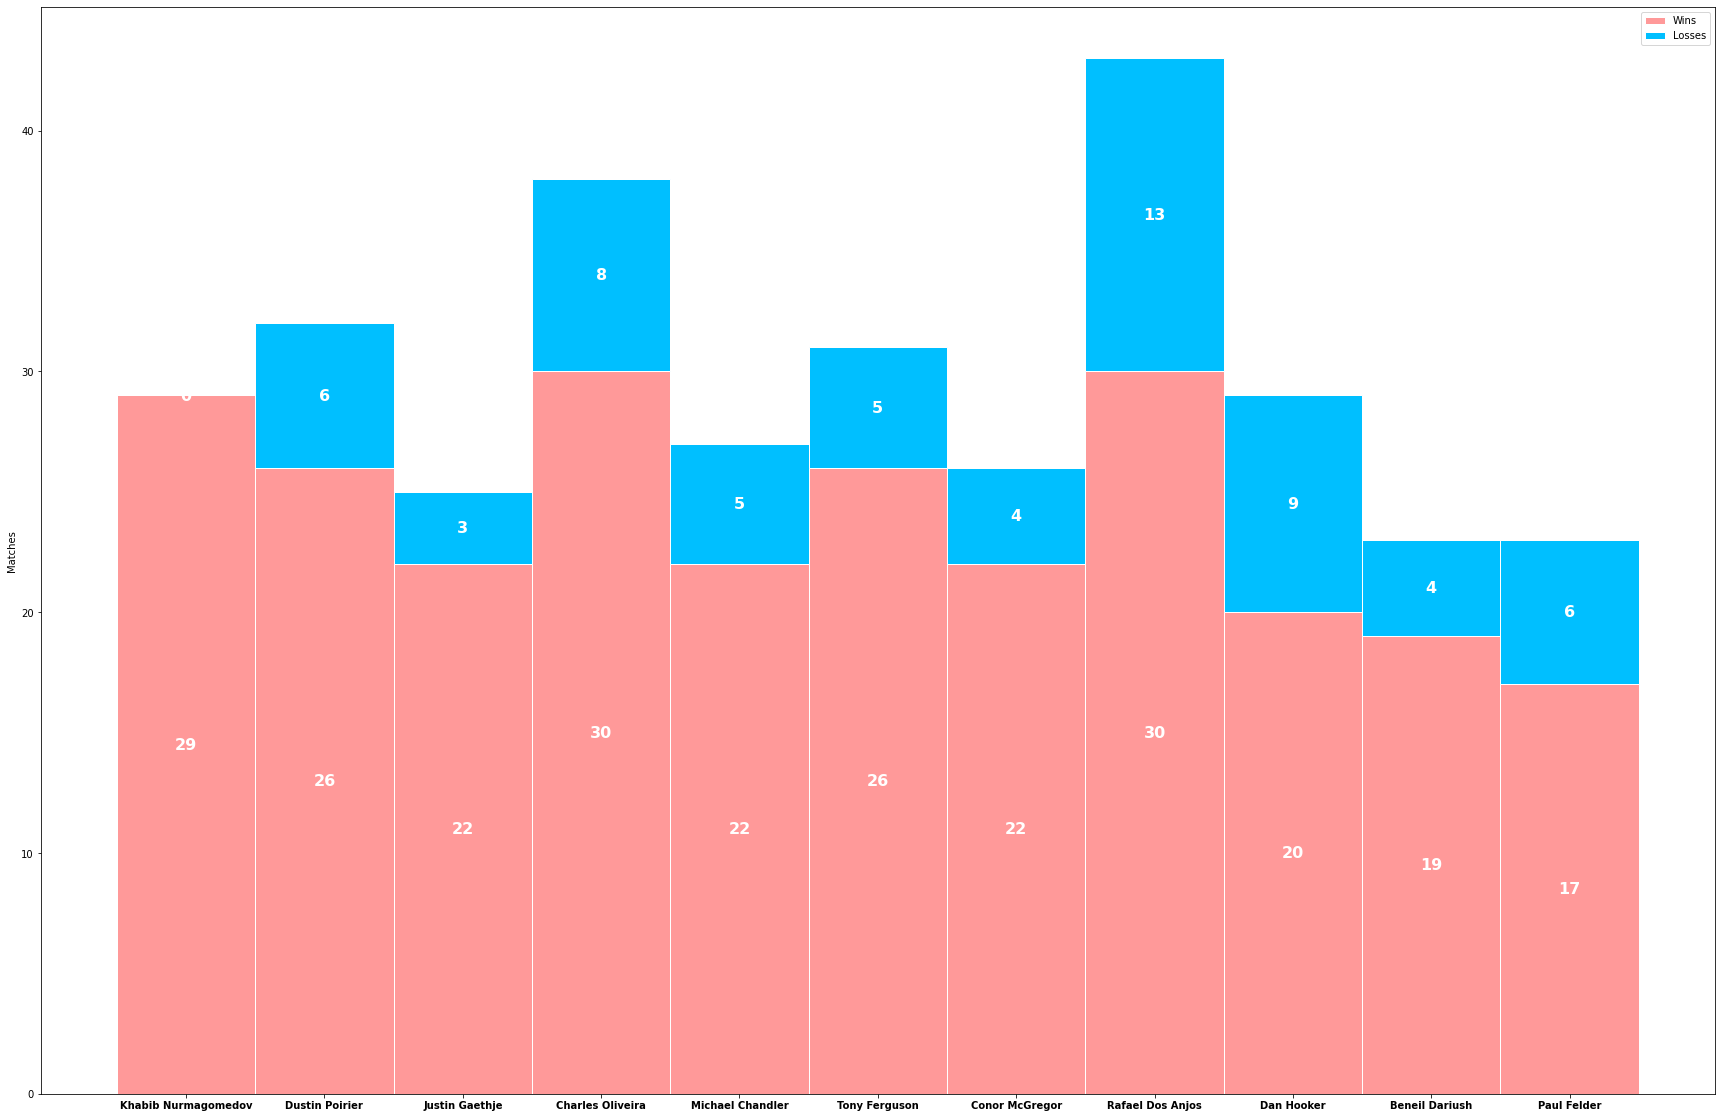

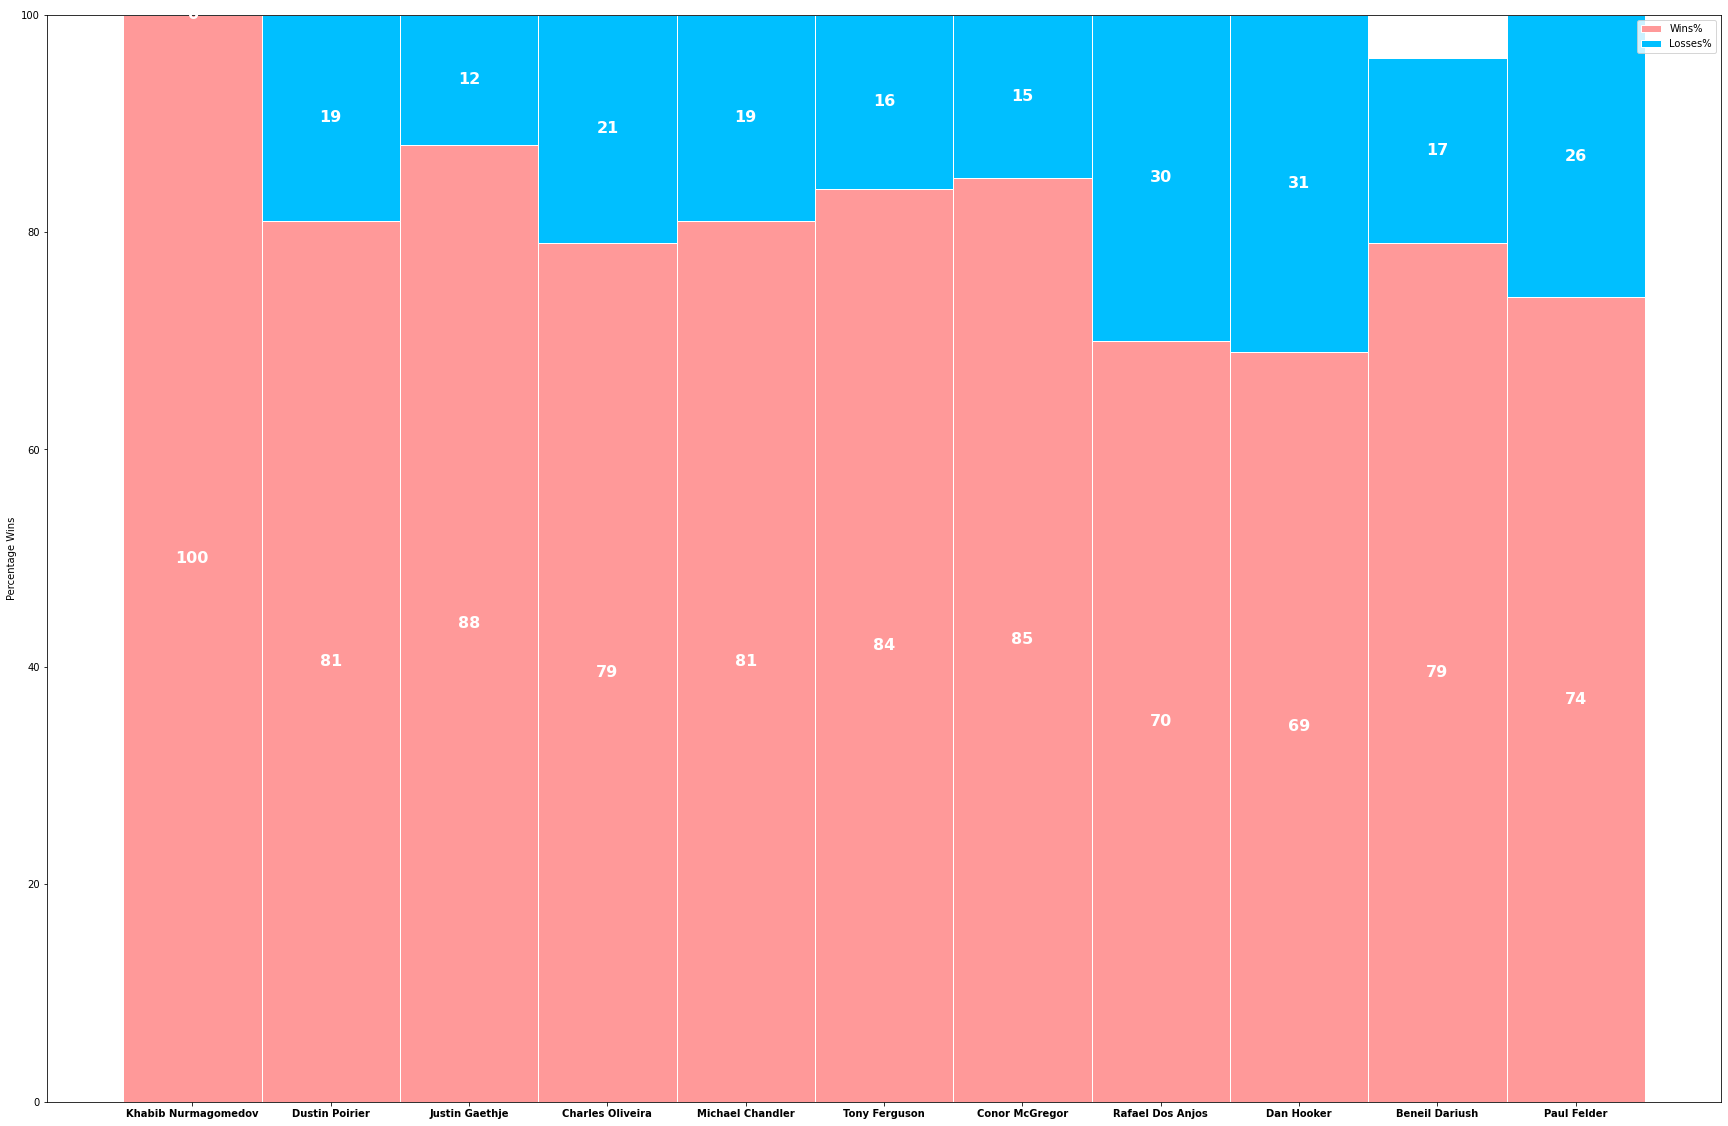

In [37]:
#add colors
colors = ['#FF9999', '#00BFFF']
# The position of the bars on the x-axis
r = range(len(top10['fighter_name']))
barWidth = 1
#plot bars
plt.figure(figsize=(30,20))
ax1=plt.bar(r, top10['Win'], color=colors[0], edgecolor='white', width=barWidth, label="Wins")
ax2=plt.bar(r, top10['Loss'], bottom=np.array(top10['Win']), color=colors[1], edgecolor='white', width=barWidth, label='Losses')
plt.legend()
# Custom X axis
plt.xticks(r, top10['fighter_name'], fontweight='bold')
plt.ylabel("Matches")

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    
plt.show()


Win = top10['Win%']*100
Loss = top10['Loss%']*100
plt.figure(figsize=(30,20))
ax1=plt.bar(r, Win, color=colors[0], edgecolor='white', width=barWidth, label="Wins%")
ax2=plt.bar(r, Loss, bottom=np.array(Win), color=colors[1], edgecolor='white', width=barWidth, label='Losses%')
plt.legend()
# Custom X axis
plt.xticks(r, top10['fighter_name'], fontweight='bold')
plt.ylabel("Percentage Wins")
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")

plt.show()


Khabib has the best record as the reigning champion with 100 percent wins in all his 29 matches which is significantly higher than all the others.

Rafael dos Anjos has the most number of matches(43) but has won only 70 percent of it and hence the ranking 8 followed by Charles Oliveira with 38 matches. However Oliveira has a 79 percent Winning rating and hence ranking 4. This is followed by tony ferguson who has a 84 percent wins in 38 matches who is ranked 6.

We need to further evaluate matches between these champions to make sense of the data.

In [38]:
# checking z distribution for the proportions of dustin and gaethje for statistical significance. Not enough data to reject H0 (p =.2358>.05)
x = (26+22)/(32+25)
y = .81-.88
std=np.sqrt(((x*(1-x))*(1/32+1/25)))
t = y /std
t

-0.7191816336797133

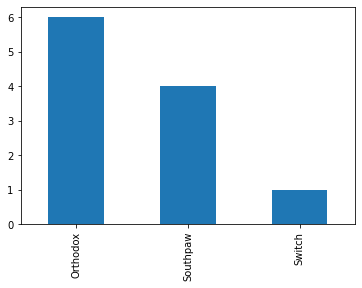

In [39]:
top10.Stance.value_counts().plot(kind ='bar')
#Atleast 6 of the top 10 is using orthodox stance

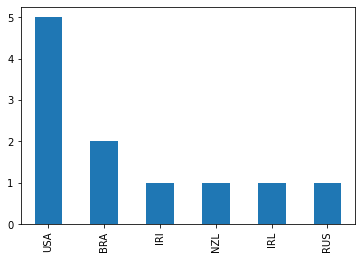

In [40]:
top10.country.value_counts().plot(kind ='bar')
# half of the champions are from the USA.

In [41]:
statcols = top10.columns[11:19]
statcols

Index(['sigstrikes_landed_permin', 'strike_acc', 'sigstrikes_abs_permin',
       'sigstrikes_def', 'takedown_avg_per15min', 'takedown_acc',
       'takedown_def', 'avg_sub_per15min'],
      dtype='object')

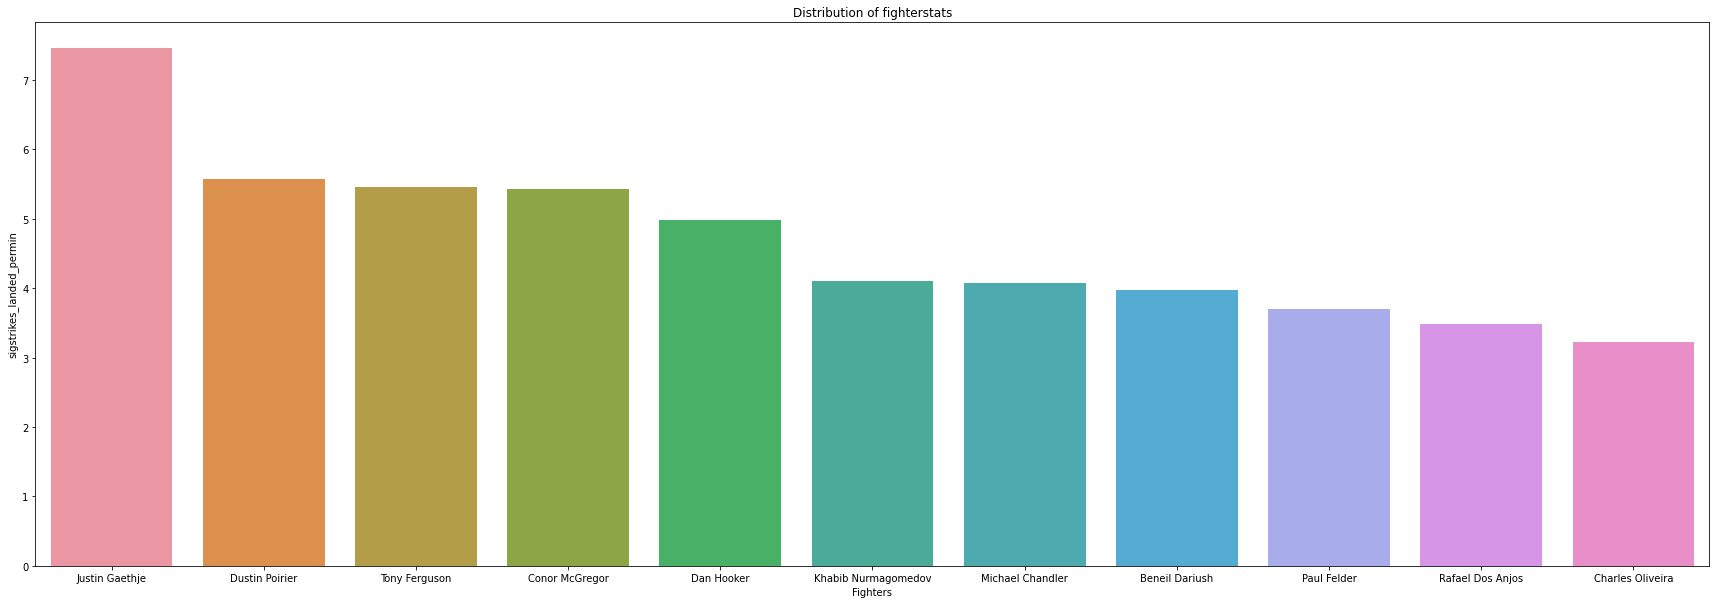

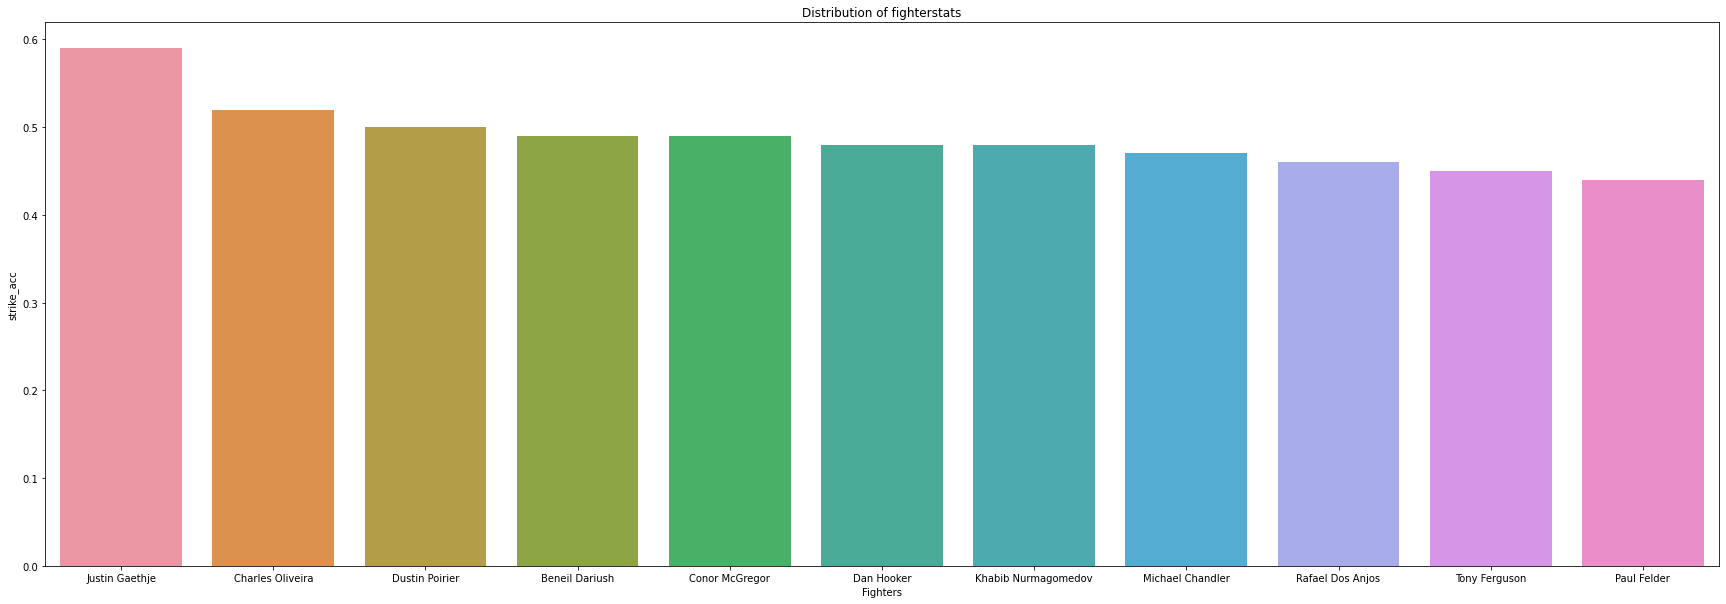

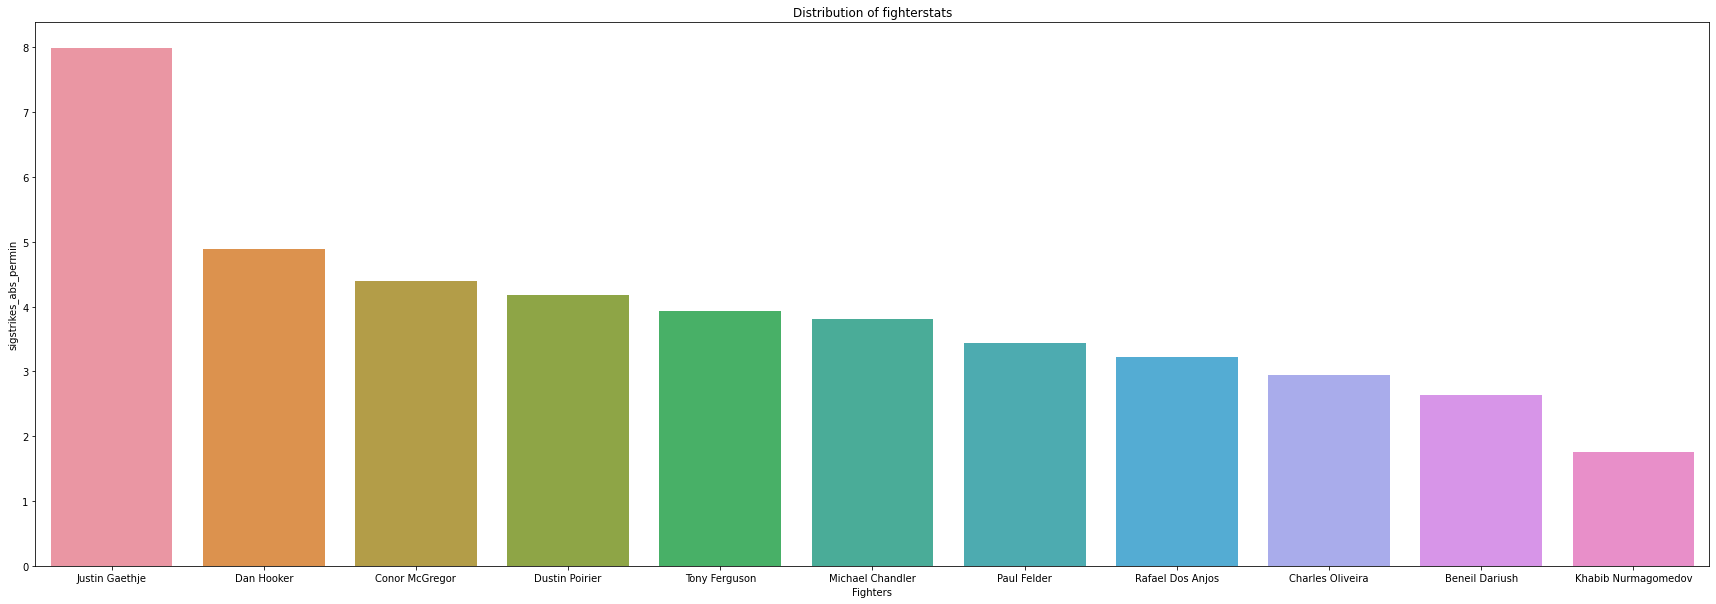

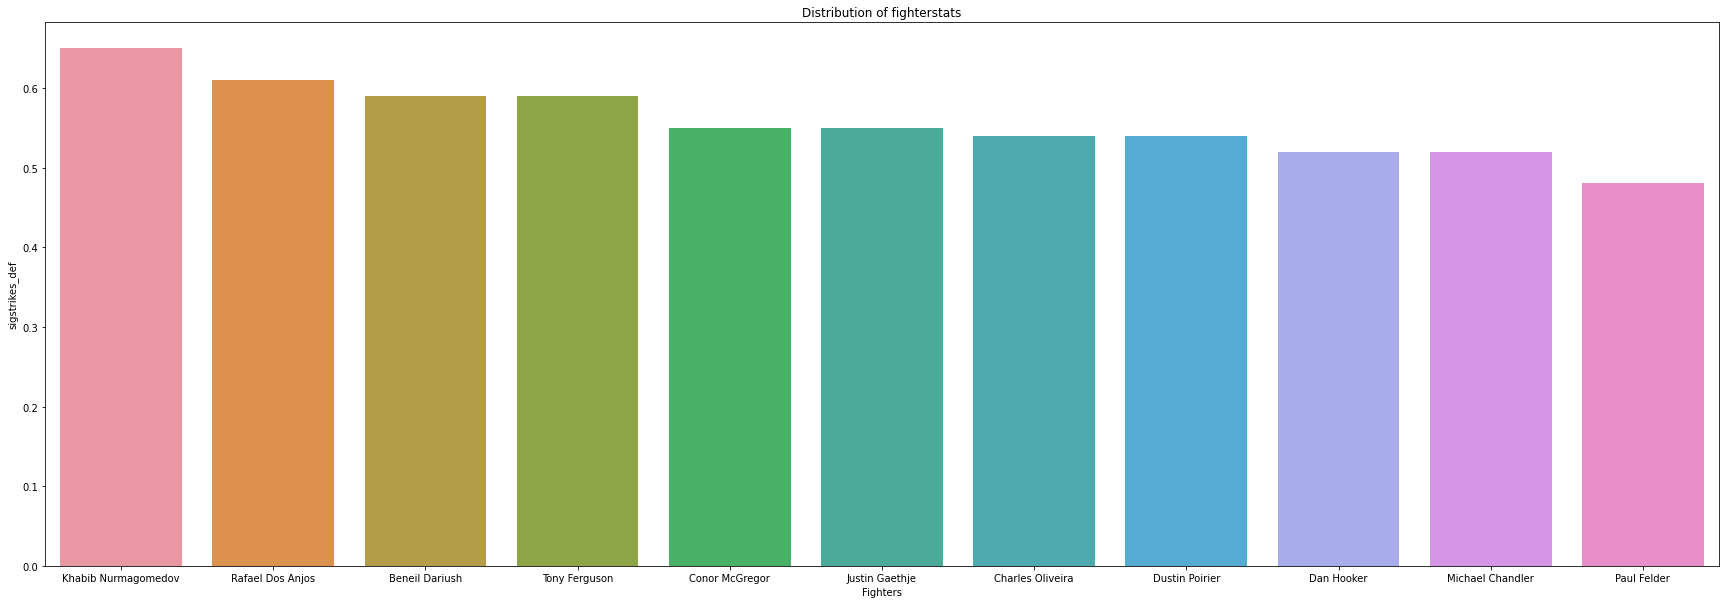

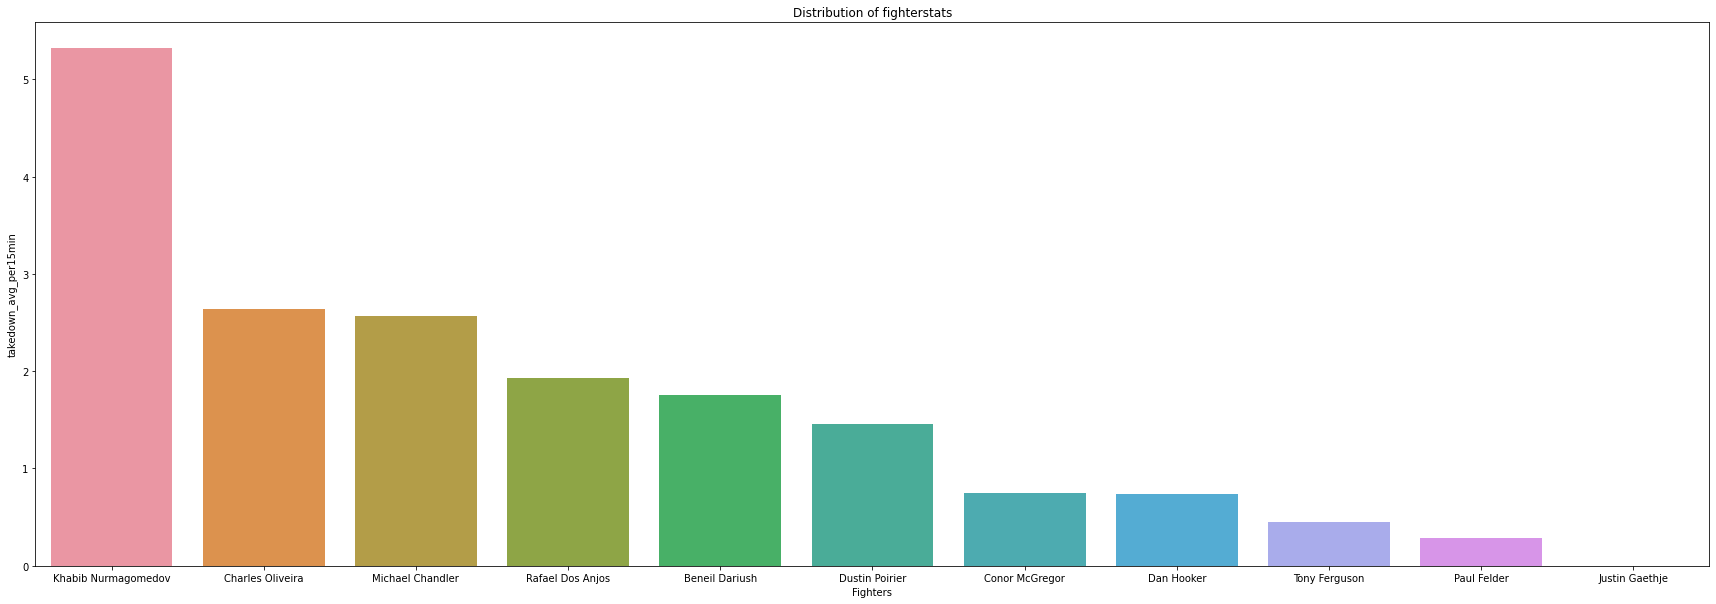

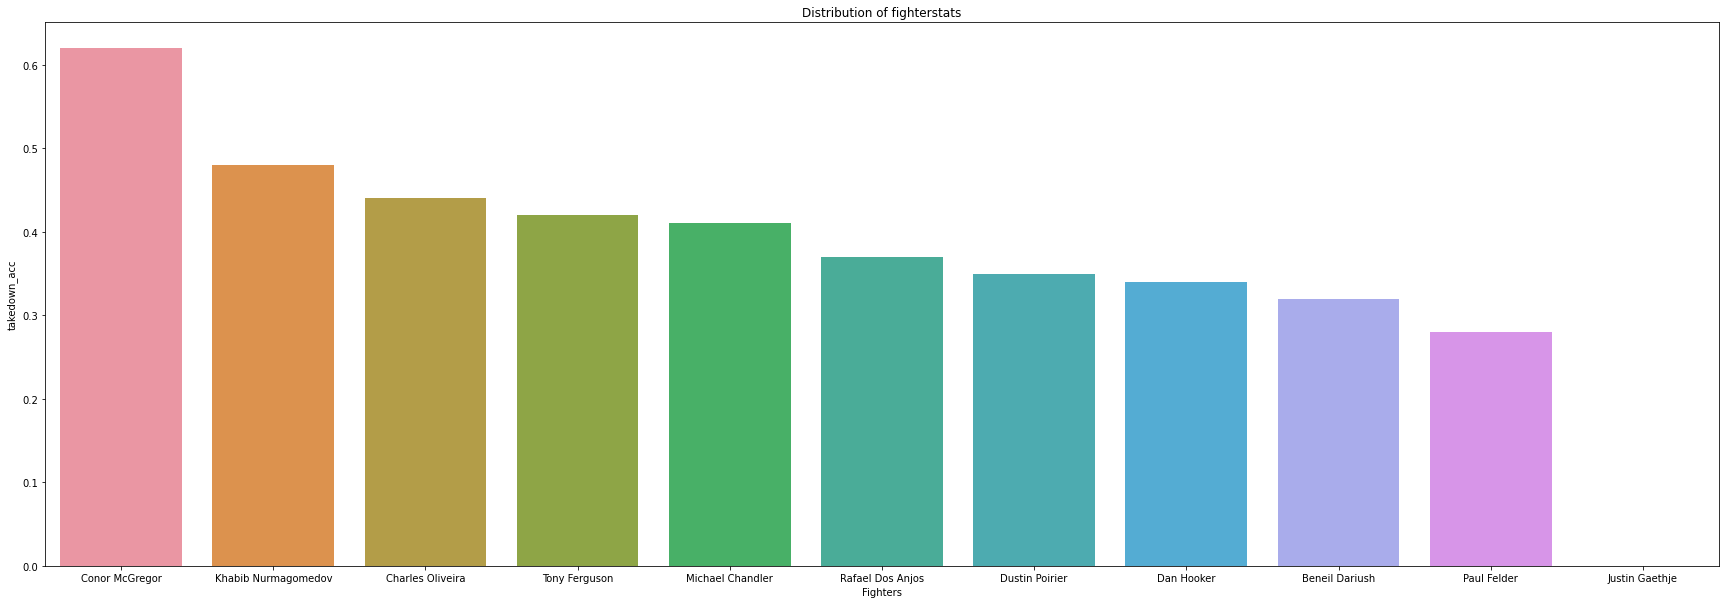

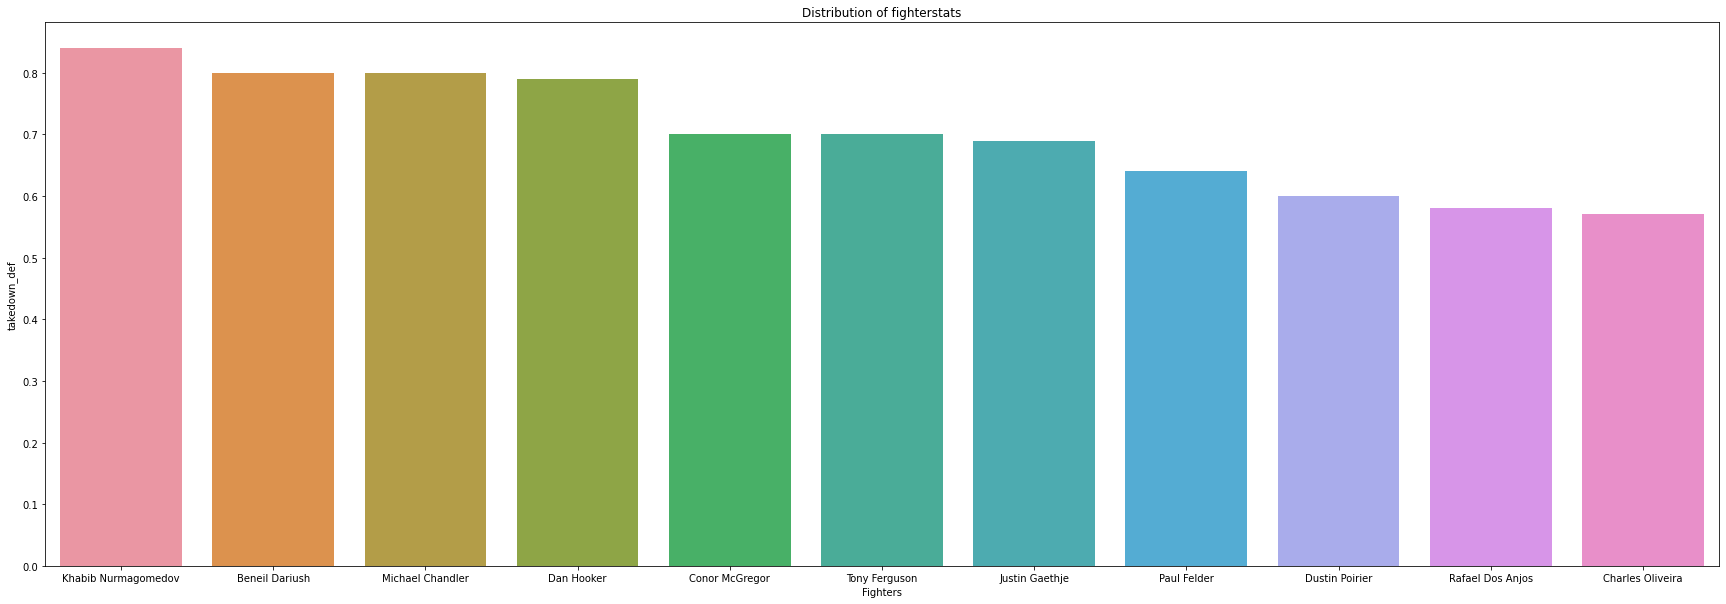

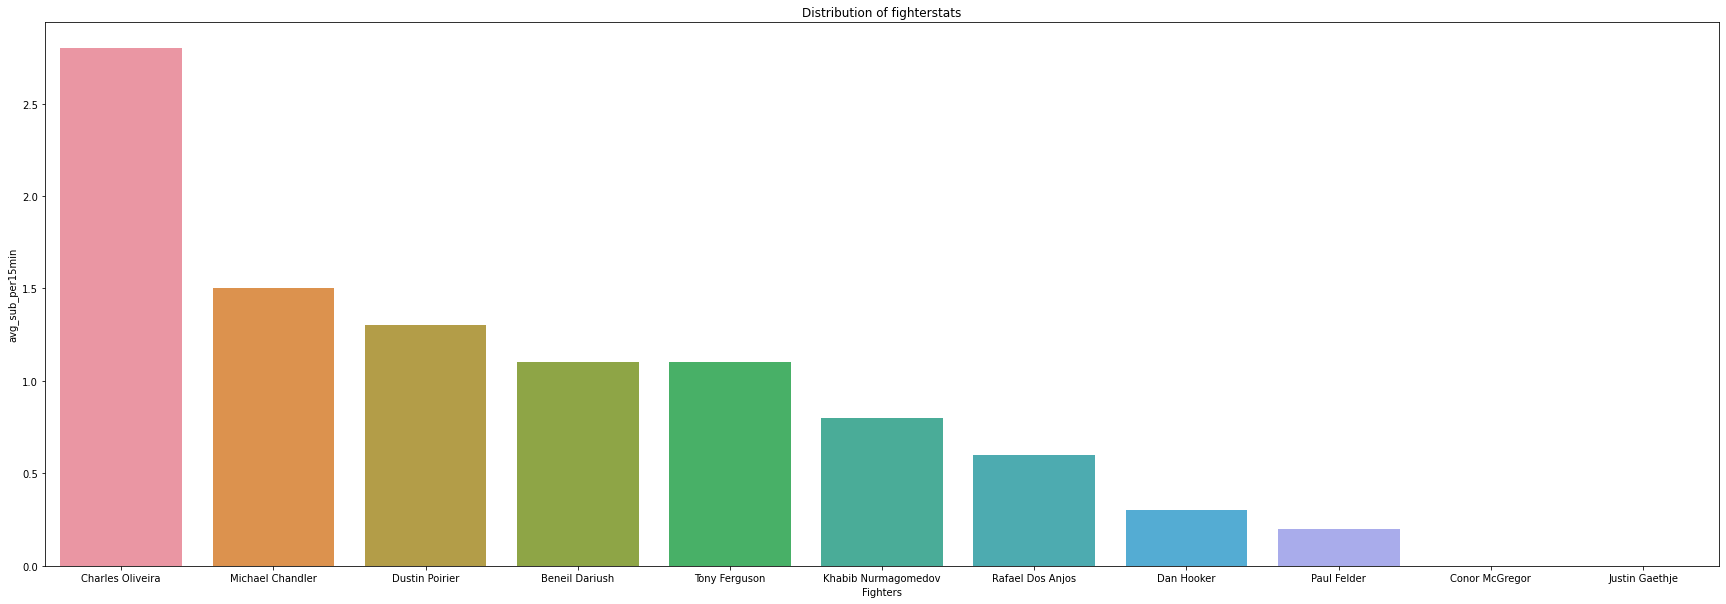

In [42]:
for i in statcols: 
    a1 = top10.groupby('fighter_name')[[i]].mean().reset_index().sort_values(i,ascending=False)
    plt.figure(figsize=(30,10))
    sns.barplot(x='fighter_name',y= i ,data = a1)
    plt.title("Distribution of fighterstats")
    plt.ylabel(i)
    plt.xlabel('Fighters')
    plt.show()

Gaethje seems to be the top striker in the divison significantly greater than the others both in terms of striking accuracy and landings per min , followed by dustin, tony and conor who all are more or less equally scored. Charles Oliveira seems to be the least striker quality fighter among them all, howvever the strikes he lands seems to be significantly accurate only behind gaethje in the division. Also strike accuracy of all the top contenders seems to be significantly good so does the strike defence and the take down defence.

Gaethje still has the highest strike absorbtion per 15 min rate as well and surpisingly Khabib has the least score. It could also mean his opponents hardly had the chance to be their best as a striker against him .


Going to average take down defence we see Khabib has the highests score among his peers and his take down average per 15 mins is significantly higher than all his peers put together along with take down accuracy and defence.

Khabib has a good overall score in all departments put together.

With submissions scores being higher for oliveira per 15 mins compared to all his peers we know that he is a wrestler with mc gregor and gaethje having zero signifying their only strike and takedown capabilities.







In [43]:
# Evaluating fights between top contenders to make sense of score cards or ranks.
top10contests = eventslist[eventslist['Fighter1'].isin(Top_10) & eventslist['Fighter2'].isin(Top_10)]
top10contests

,Fighter1,Fighter2,KD1,KD2,STR1,STR2,TD1,TD2,SUB1,SUB2,weight_class,method,empty,matchrounds,matchtime,Output_f1
23,Charles Oliveira,Tony Ferguson,0,0,41,19,3,0,3,0,Lightweight,U-DEC,NaN,3.0,5:00,1
62,Paul Felder,Rafael Dos Anjos,0,0,98,92,1,6,0,0,Lightweight,S-DEC,NaN,5.0,5:00,0
92,Justin Gaethje,Khabib Nurmagomedov,0,0,29,26,0,2,0,1,Lightweight,SUB,Triangle Choke,2.0,1:34,0
284,Dustin Poirier,Dan Hooker,0,0,153,155,1,4,4,0,Lightweight,U-DEC,NaN,5.0,5:00,1
360,Tony Ferguson,Justin Gaethje,0,0,136,143,0,0,0,0,Lightweight,KO/TKO,Punch,5.0,3:39,0
406,Dan Hooker,Paul Felder,0,0,122,110,1,0,0,0,Lightweight,S-DEC,NaN,5.0,5:00,1
627,Khabib Nurmagomedov,Dustin Poirier,0,0,22,12,7,0,2,1,Lightweight,SUB,Rear Naked Choke,3.0,NaN,1
1106,Khabib Nurmagomedov,Conor McGregor,0,0,70,51,3,0,1,0,Lightweight,SUB,Neck Crank,4.0,NaN,1
1330,Justin Gaethje,Dustin Poirier,0,0,115,174,0,0,0,0,Lightweight,KO/TKO,Punch,4.0,NaN,0
1495,Charles Oliveira,Paul Felder,0,0,6,31,2,0,2,0,Lightweight,KO/TKO,Elbows,2.0,NaN,0


No 1 Khabib seems to have beaten the number 2 Dustin , number 3 Gaethje , number 7 Conor and number 8 Rafael and almost everyone by take down submissions and last by unanimous decision based on take down and striking points. Khabib prefers the wrestling style more than striking.

Number 2 Dustin has beaten number 3 justin by KO, number 9 Dan hooker by U-DEC, but got beaten by both number 1 and number 7 fighter. ( as per latest fight card he has beaten number 7 fighter after their first bout and hence ranking in number 2). Dustin seems to be a striker.

Number 3 Justin has beaten Number 6 tony by KO, but has lost to both number 1 and number 2 fighters. He seems to be a striker as well.

Statistics change with one top contender defeating the other just in case of dustin defeating conor recently putting him in the runner up position in lightweight champions.

And the list statistics can be read as per above.

In [44]:
top10contests_total = eventslist[eventslist['Fighter1'].isin(Top_10) | eventslist['Fighter2'].isin(Top_10)]

In [45]:
from pivottablejs import pivot_ui
pivot_ui(top10contests_total[top10contests_total['Fighter1'].isin(Top_10)])

In [46]:
pivot_ui(top10contests_total[top10contests_total['Fighter2'].isin(Top_10)])

In [47]:
khabib = top10contests_total[(top10contests_total['Fighter1']=='Khabib Nurmagomedov')| (top10contests_total['Fighter2']=='Khabib Nurmagomedov')]
khabib.count()

Fighter1        13
Fighter2        13
KD1             13
KD2             13
STR1            13
STR2            13
TD1             13
TD2             13
SUB1            13
SUB2            13
weight_class    13
method          13
empty            7
matchrounds     13
matchtime        1
Output_f1       13
dtype: int64

In [48]:
eventslist[(eventslist['Fighter1']=='Khabib Nurmagomedov')| (eventslist['Fighter2']=='Khabib Nurmagomedov')].count()

# Not all match data is available in total event listings

Fighter1        13
Fighter2        13
KD1             13
KD2             13
STR1            13
STR2            13
TD1             13
TD2             13
SUB1            13
SUB2            13
weight_class    13
method          13
empty            7
matchrounds     13
matchtime        1
Output_f1       13
dtype: int64

In [49]:
fighters_sig = pd.read_csv(r'C:\Users\akars\Downloads\sigfightersdata.csv')
fighters_sig

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
0,Danny Abbadi,RUS,Lightweight,38,180.34,155,0.00,Orthodox,4,6,...,4.41,0.57,0.00,0.00,0.77,0.0,10,0.40,0.60,0.00
1,David Abbott,USA,Heavyweight,0,182.88,265,0.00,Switch,10,15,...,3.55,0.38,1.07,0.33,0.66,0.0,25,0.40,0.60,0.00
2,Shamil Abdurakhimov,RUS,Heavyweight,40,190.50,235,193.04,Orthodox,20,5,...,2.45,0.58,1.23,0.24,0.47,0.2,25,0.80,0.20,0.00
3,Hiroyuki Abe,JPN,Lightweight,0,167.64,145,0.00,Orthodox,8,15,...,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
4,Daichi Abe,JPN,Welterweight,30,180.34,170,180.34,Orthodox,6,2,...,4.49,0.56,0.33,0.50,0.00,0.0,8,0.75,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Errol Zimmerman,USA,Middleweight,35,190.50,185,0.00,Orthodox,0,1,...,0.00,0.00,0.00,0.00,0.00,0.0,1,0.00,1.00,0.00
2944,Cat Zingano,USA,Women's Bantamweight,39,167.64,145,172.72,Southpaw,10,4,...,1.63,0.47,2.77,0.65,0.42,0.8,14,0.71,0.29,0.00
2945,George Zuniga,CRC,Middleweight,0,175.26,185,0.00,NaN,3,1,...,5.45,0.37,0.00,0.00,1.00,0.0,4,0.75,0.25,0.00
2946,Allan Zuniga,CRC,Lightweight,29,170.18,155,177.80,Orthodox,13,1,...,1.80,0.61,0.00,0.00,0.57,1.0,14,0.93,0.07,0.00


In [50]:
fighters_sig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 23 columns):
fighter_name                2948 non-null object
country                     2948 non-null object
weight_class                2936 non-null object
age                         2948 non-null int64
Ht(cm)                      2948 non-null float64
Wt(lbs)                     2948 non-null int64
Reach (cm)                  2948 non-null float64
Stance                      2595 non-null object
Win                         2948 non-null int64
Loss                        2948 non-null int64
Draw                        2948 non-null int64
sigstrikes_landed_permin    2948 non-null float64
strike_acc                  2948 non-null float64
sigstrikes_abs_permin       2948 non-null float64
sigstrikes_def              2948 non-null float64
takedown_avg_per15min       2948 non-null float64
takedown_acc                2948 non-null float64
takedown_def                2948 non-null float64
avg_sub

In [51]:
fighters_sig.describe()

,age,Ht(cm),Wt(lbs),Reach (cm),Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
count,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2947.000000,2947.000000,2947.000000
mean,32.657734,174.113209,170.153664,103.175007,13.492198,6.073948,0.292062,2.776740,0.419525,3.626180,0.514898,1.472398,0.315807,0.458358,0.787517,19.858209,0.678626,0.310102,0.011259
std,13.524270,28.893708,38.743304,90.811055,8.561972,5.062818,0.863924,1.740198,0.144953,2.709675,0.133648,2.021284,0.294110,0.329868,1.781885,12.718704,0.164425,0.161062,0.030587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,172.720000,145.000000,0.000000,8.000000,3.000000,0.000000,1.550000,0.350000,2.200000,0.450000,0.000000,0.000000,0.000000,0.000000,11.000000,0.620000,0.210000,0.000000
50%,35.000000,177.800000,170.000000,170.180000,12.000000,5.000000,0.000000,2.600000,0.420000,3.140000,0.530000,0.970000,0.310000,0.500000,0.200000,17.000000,0.700000,0.290000,0.000000
75%,41.000000,185.420000,185.000000,185.420000,18.000000,8.000000,0.000000,3.690000,0.500000,4.310000,0.600000,2.142500,0.500000,0.700000,1.000000,26.000000,0.780000,0.370000,0.000000
max,65.000000,226.060000,400.000000,213.360000,91.000000,83.000000,11.000000,17.650000,1.000000,52.500000,1.000000,32.140000,1.000000,1.000000,29.000000,139.000000,1.000000,1.000000,0.330000


In [52]:
fighters_sig[fighters_sig['age']==0]

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
1,David Abbott,USA,Heavyweight,0,182.88,265,0.0,Switch,10,15,...,3.55,0.38,1.07,0.33,0.66,0.0,25,0.40,0.60,0.00
3,Hiroyuki Abe,JPN,Lightweight,0,167.64,145,0.0,Orthodox,8,15,...,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
18,Mike Aina,USA,Lightweight,0,175.26,155,0.0,Orthodox,14,6,...,6.33,0.59,0.00,0.00,0.71,0.0,21,0.67,0.29,0.05
31,Israel Albuquerque,RUS,Middleweight,0,0.00,185,0.0,Orthodox,0,3,...,3.34,0.25,0.00,0.00,0.00,0.0,3,0.00,1.00,0.00
60,Mike Altman,USA,Middleweight,0,177.80,185,0.0,Orthodox,1,4,...,2.08,0.75,0.00,0.00,0.00,0.0,5,0.20,0.80,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,Rubens Xavier,BRA,Heavyweight,0,190.50,220,0.0,Orthodox,5,3,...,1.82,0.21,2.10,0.40,0.25,1.1,8,0.62,0.38,0.00
2895,Takeshi Yamazaki,JPN,Bantamweight,0,172.72,139,0.0,Southpaw,15,12,...,1.57,0.47,4.50,0.50,1.00,1.0,30,0.50,0.40,0.10
2934,Carlos Zevallos,USA,Light Heavyweight,0,182.88,205,0.0,Orthodox,3,4,...,2.28,0.68,0.00,0.00,1.00,0.0,7,0.43,0.57,0.00
2941,Mike Zichelle,USA,Light Heavyweight,0,0.00,205,0.0,NaN,8,4,...,0.87,0.40,0.00,0.00,0.00,2.0,12,0.67,0.33,0.00


In [53]:
fighters_sig['age'].replace({0:fighters_sig['age'].mean()}, inplace=True)

In [54]:
fighters_sig.groupby('weight_class')[['Ht(cm)','Wt(lbs)','Reach (cm)']].mean()

,Ht(cm),Wt(lbs),Reach (cm)
weight_class,,,
Bantamweight,166.049204,135.591696,109.290311
Catch Weight,178.505556,164.722222,174.272222
Featherweight,174.304514,145.062696,114.929028
Flyweight,165.024741,124.037037,117.498519
Heavyweight,187.596060,247.564179,77.670925
Light Heavyweight,177.165000,204.225352,95.679296
Lightweight,170.649580,155.405462,100.063193
Middleweight,178.456897,185.339901,91.984286
Open Weight,185.420000,199.200000,0.000000


In [55]:
# replacing zero values of height and weight with avg per weight class
fighters_sig['Ht(cm)'] = fighters_sig['Ht(cm)'].replace(0, np.nan)
fighters_sig['Ht(cm)']=fighters_sig['Ht(cm)'].fillna(fighters_sig.groupby('weight_class')['Ht(cm)'].transform('mean'))
fighters_sig['Wt(lbs)'] = fighters_sig['Wt(lbs)'].replace(0, np.nan)
fighters_sig['Wt(lbs)']=fighters_sig['Wt(lbs)'].fillna(fighters_sig.groupby('weight_class')['Wt(lbs)'].transform('mean'))
fighters_sig['Reach (cm)'] = fighters_sig['Reach (cm)'].replace(0, np.nan)
fighters_sig['Reach (cm)']=fighters_sig['Reach (cm)'].fillna(fighters_sig.groupby('weight_class')['Reach (cm)'].transform('mean'))
fighters_sig.describe()

,age,Ht(cm),Wt(lbs),Reach (cm),Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
count,2948.000000,2937.000000,2936.000000,2931.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2947.000000,2947.000000,2947.000000
mean,36.512853,178.501439,170.849114,183.921902,13.492198,6.073948,0.292062,2.776740,0.419525,3.626180,0.514898,1.472398,0.315807,0.458358,0.787517,19.858209,0.678626,0.310102,0.011259
std,6.488199,8.750555,37.260207,9.607447,8.561972,5.062818,0.863924,1.740198,0.144953,2.709675,0.133648,2.021284,0.294110,0.329868,1.781885,12.718704,0.164425,0.161062,0.030587
min,22.000000,152.400000,105.000000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.657734,172.720000,145.000000,177.800000,8.000000,3.000000,0.000000,1.550000,0.350000,2.200000,0.450000,0.000000,0.000000,0.000000,0.000000,11.000000,0.620000,0.210000,0.000000
50%,35.000000,177.800000,170.000000,185.420000,12.000000,5.000000,0.000000,2.600000,0.420000,3.140000,0.530000,0.970000,0.310000,0.500000,0.200000,17.000000,0.700000,0.290000,0.000000
75%,41.000000,185.420000,185.000000,190.538878,18.000000,8.000000,0.000000,3.690000,0.500000,4.310000,0.600000,2.142500,0.500000,0.700000,1.000000,26.000000,0.780000,0.370000,0.000000
max,65.000000,226.060000,400.000000,213.360000,91.000000,83.000000,11.000000,17.650000,1.000000,52.500000,1.000000,32.140000,1.000000,1.000000,29.000000,139.000000,1.000000,1.000000,0.330000


In [56]:
fighters_sig.isnull().sum()

fighter_name                  0
country                       0
weight_class                 12
age                           0
Ht(cm)                       11
Wt(lbs)                      12
Reach (cm)                   17
Stance                      353
Win                           0
Loss                          0
Draw                          0
sigstrikes_landed_permin      0
strike_acc                    0
sigstrikes_abs_permin         0
sigstrikes_def                0
takedown_avg_per15min         0
takedown_acc                  0
takedown_def                  0
avg_sub_per15min              0
total_matches                 0
Win%                          1
Loss%                         1
Draw%                         1
dtype: int64

In [57]:
fighters_sig[fighters_sig['Wt(lbs)'].isnull()]
# these are the 12 rows with no available weight class that coincides with the no weight and height numbers. Lets ignore that for now

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
451,Nikolajus Cilkinas,USA,NaN,32.657734,NaN,NaN,NaN,Orthodox,2,6,...,5.88,0.16,0.00,0.00,0.00,0.0,8,0.25,0.75,0.00
604,John Devine,ENG,NaN,32.657734,NaN,NaN,NaN,NaN,6,4,...,2.28,0.57,0.00,0.00,0.00,0.0,10,0.60,0.40,0.00
1308,Aurelijus Kerpe,FRA,NaN,32.657734,NaN,NaN,NaN,Orthodox,11,22,...,8.21,0.31,0.00,0.00,0.00,0.0,33,0.33,0.67,0.00
1439,Imani Lee,SKO,NaN,32.657734,NaN,NaN,NaN,Orthodox,2,4,...,0.94,0.33,0.00,0.00,0.00,0.0,6,0.33,0.67,0.00
1457,Michael Lerma,FRA,NaN,32.657734,NaN,NaN,NaN,NaN,0,1,...,6.47,0.45,0.00,0.00,0.00,0.0,1,0.00,1.00,0.00
1471,Sam Liera,CAN,NaN,32.657734,NaN,NaN,NaN,NaN,12,10,...,7.36,0.51,0.00,0.00,0.66,0.0,22,0.55,0.45,0.00
1482,Miguel Linares,CHN,NaN,32.657734,NaN,NaN,NaN,NaN,2,4,...,8.84,0.36,0.00,0.00,0.00,0.0,6,0.33,0.67,0.00
1554,Lolohea Mahe,ENG,NaN,32.657734,NaN,NaN,NaN,NaN,10,4,...,6.92,0.40,2.44,0.40,0.00,0.0,15,0.67,0.27,0.07
1636,Bobby McAndrews,USA,NaN,32.657734,NaN,NaN,NaN,Orthodox,1,3,...,1.03,0.50,0.00,0.00,0.33,7.7,4,0.25,0.75,0.00
1936,Masakatsu Okuda,HUN,NaN,32.657734,NaN,NaN,NaN,NaN,8,5,...,4.27,0.34,0.00,0.00,0.00,4.3,13,0.62,0.38,0.00


In [58]:
fighters_sig.Stance.value_counts()

Orthodox       2016
Southpaw        458
Switch          114
Open Stance       6
Sideways          1
Name: Stance, dtype: int64

In [59]:
fighters_sig['Stance'] = fighters_sig.Stance.fillna(fighters_sig['Stance'].value_counts().index[0])
# filling missing stance with the most common stance ie, right sided(orthodox)

In [60]:
fighters_sig = fighters_sig[~fighters_sig['Wt(lbs)'].isnull()]
fighters_sig.isnull().sum()

fighter_name                0
country                     0
weight_class                0
age                         0
Ht(cm)                      0
Wt(lbs)                     0
Reach (cm)                  5
Stance                      0
Win                         0
Loss                        0
Draw                        0
sigstrikes_landed_permin    0
strike_acc                  0
sigstrikes_abs_permin       0
sigstrikes_def              0
takedown_avg_per15min       0
takedown_acc                0
takedown_def                0
avg_sub_per15min            0
total_matches               0
Win%                        1
Loss%                       1
Draw%                       1
dtype: int64

In [61]:
fighters_sig[fighters_sig['Win%'].isnull()]
# One fighter with no win or loss or matches data. Might as well remove it.

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
2495,Chris Solomon,USA,Lightweight,32.657734,180.34,155.0,181.794198,Orthodox,0,0,...,2.8,0.37,0.0,0.0,0.33,0.0,0,NaN,NaN,NaN


In [62]:
fighters_sig= fighters_sig[~fighters_sig['Win%'].isnull()]
fighters_sig.isnull().sum()

fighter_name                0
country                     0
weight_class                0
age                         0
Ht(cm)                      0
Wt(lbs)                     0
Reach (cm)                  5
Stance                      0
Win                         0
Loss                        0
Draw                        0
sigstrikes_landed_permin    0
strike_acc                  0
sigstrikes_abs_permin       0
sigstrikes_def              0
takedown_avg_per15min       0
takedown_acc                0
takedown_def                0
avg_sub_per15min            0
total_matches               0
Win%                        0
Loss%                       0
Draw%                       0
dtype: int64

In [63]:
fighters_sig[fighters_sig['Reach (cm)'].isnull()]
# These are all openweight fighters

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
820,Don Frye,BRA,Open Weight,56.0,185.42,219.0,NaN,Orthodox,20,9,...,3.57,0.37,0.91,0.57,0.45,0.7,30,0.67,0.30,0.03
823,Katsuhisa Fujii,ESP,Open Weight,49.0,182.88,205.0,NaN,Orthodox,9,18,...,4.43,0.64,2.14,0.25,0.50,2.1,28,0.32,0.64,0.04
933,Royce Gracie,BRA,Open Weight,55.0,185.42,175.0,NaN,Southpaw,15,2,...,1.13,0.37,0.00,0.00,0.66,0.8,20,0.75,0.10,0.15
2680,Roberto Traven,AUT,Open Weight,53.0,190.50,227.0,NaN,Orthodox,6,4,...,2.77,0.57,0.00,0.00,0.00,0.0,11,0.55,0.36,0.09
2889,Kenichi Yamamoto,JPN,Open Weight,45.0,182.88,170.0,NaN,Orthodox,5,12,...,1.93,0.38,0.00,0.00,0.10,0.3,19,0.26,0.63,0.11


In [64]:
fighters_sig.weight_class.value_counts()

Welterweight             486
Lightweight              475
Middleweight             406
Heavyweight              335
Featherweight            319
Bantamweight             289
Light Heavyweight        284
Flyweight                135
Women's Strawweight       68
Women's Flyweight         59
Women's Bantamweight      50
Catch Weight              18
Women's Featherweight      6
Open Weight                5
Name: weight_class, dtype: int64

In [65]:
 rep = fighters_sig.loc[fighters_sig["weight_class"] == "Heavyweight",'Reach (cm)'].mean()

In [66]:
# Since their weight falls under heavyweight category lets give them the avergae heavyweight reach value
fighters_sig['Reach (cm)']=fighters_sig['Reach (cm)'].fillna(rep)
fighters_sig.isnull().sum()

fighter_name                0
country                     0
weight_class                0
age                         0
Ht(cm)                      0
Wt(lbs)                     0
Reach (cm)                  0
Stance                      0
Win                         0
Loss                        0
Draw                        0
sigstrikes_landed_permin    0
strike_acc                  0
sigstrikes_abs_permin       0
sigstrikes_def              0
takedown_avg_per15min       0
takedown_acc                0
takedown_def                0
avg_sub_per15min            0
total_matches               0
Win%                        0
Loss%                       0
Draw%                       0
dtype: int64

In [67]:
fighters_sig.describe()

,age,Ht(cm),Wt(lbs),Reach (cm),Win,Loss,Draw,sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
count,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.00000,2935.000000,2935.000000,2935.000000
mean,36.529929,178.501052,170.854514,183.942585,13.530494,6.076320,0.293015,2.782995,0.420068,3.621543,0.515496,1.474835,0.316504,0.459939,0.784225,19.89983,0.679721,0.308981,0.011281
std,6.497469,8.753462,37.265407,9.612966,8.557019,5.061345,0.865535,1.737358,0.143644,2.709039,0.133457,2.021902,0.293839,0.329472,1.774634,12.71791,0.163426,0.159947,0.030623
min,22.000000,152.400000,105.000000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,32.657734,172.720000,145.000000,177.800000,8.000000,3.000000,0.000000,1.560000,0.350000,2.200000,0.450000,0.000000,0.000000,0.065000,0.000000,11.00000,0.620000,0.210000,0.000000
50%,35.000000,177.800000,170.000000,185.420000,12.000000,5.000000,0.000000,2.600000,0.420000,3.140000,0.530000,0.980000,0.310000,0.500000,0.200000,17.00000,0.700000,0.290000,0.000000
75%,41.000000,185.420000,185.000000,190.538878,18.000000,8.000000,0.000000,3.690000,0.500000,4.310000,0.600000,2.145000,0.500000,0.705000,1.000000,26.00000,0.780000,0.370000,0.000000
max,65.000000,226.060000,400.000000,213.360000,91.000000,83.000000,11.000000,17.650000,1.000000,52.500000,1.000000,32.140000,1.000000,1.000000,29.000000,139.00000,1.000000,1.000000,0.330000


In [68]:
fighter_similarity = fighters_sig.drop(['fighter_name','country','weight_class','Stance','Win','Loss','Draw'], axis = 1) 
fighter_similarity

,age,Ht(cm),Wt(lbs),Reach (cm),sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
0,38.000000,180.34,155.0,181.794198,3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,10,0.40,0.60,0.00
1,32.657734,182.88,265.0,195.637293,1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0,25,0.40,0.60,0.00
2,40.000000,190.50,235.0,193.040000,2.45,0.44,2.45,0.58,1.23,0.24,0.47,0.2,25,0.80,0.20,0.00
3,32.657734,167.64,145.0,181.794198,1.71,0.36,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
4,30.000000,180.34,170.0,180.340000,3.80,0.33,4.49,0.56,0.33,0.50,0.00,0.0,8,0.75,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,35.000000,190.50,185.0,190.538878,2.95,0.42,0.00,0.00,0.00,0.00,0.00,0.0,1,0.00,1.00,0.00
2944,39.000000,167.64,145.0,172.720000,2.57,0.61,1.63,0.47,2.77,0.65,0.42,0.8,14,0.71,0.29,0.00
2945,32.657734,175.26,185.0,190.538878,7.64,0.38,5.45,0.37,0.00,0.00,1.00,0.0,4,0.75,0.25,0.00
2946,29.000000,170.18,155.0,177.800000,3.93,0.52,1.80,0.61,0.00,0.00,0.57,1.0,14,0.93,0.07,0.00


In [69]:
fighter_similarity.isnull().sum()

age                         0
Ht(cm)                      0
Wt(lbs)                     0
Reach (cm)                  0
sigstrikes_landed_permin    0
strike_acc                  0
sigstrikes_abs_permin       0
sigstrikes_def              0
takedown_avg_per15min       0
takedown_acc                0
takedown_def                0
avg_sub_per15min            0
total_matches               0
Win%                        0
Loss%                       0
Draw%                       0
dtype: int64

In [70]:
fighter_similarity.describe()

,age,Ht(cm),Wt(lbs),Reach (cm),sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
count,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.00000,2935.000000,2935.000000,2935.000000
mean,36.529929,178.501052,170.854514,183.942585,2.782995,0.420068,3.621543,0.515496,1.474835,0.316504,0.459939,0.784225,19.89983,0.679721,0.308981,0.011281
std,6.497469,8.753462,37.265407,9.612966,1.737358,0.143644,2.709039,0.133457,2.021902,0.293839,0.329472,1.774634,12.71791,0.163426,0.159947,0.030623
min,22.000000,152.400000,105.000000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,32.657734,172.720000,145.000000,177.800000,1.560000,0.350000,2.200000,0.450000,0.000000,0.000000,0.065000,0.000000,11.00000,0.620000,0.210000,0.000000
50%,35.000000,177.800000,170.000000,185.420000,2.600000,0.420000,3.140000,0.530000,0.980000,0.310000,0.500000,0.200000,17.00000,0.700000,0.290000,0.000000
75%,41.000000,185.420000,185.000000,190.538878,3.690000,0.500000,4.310000,0.600000,2.145000,0.500000,0.705000,1.000000,26.00000,0.780000,0.370000,0.000000
max,65.000000,226.060000,400.000000,213.360000,17.650000,1.000000,52.500000,1.000000,32.140000,1.000000,1.000000,29.000000,139.00000,1.000000,1.000000,0.330000


In [71]:
stance  = fighters_sig['Stance'].str.get_dummies()
stance

,Open Stance,Orthodox,Sideways,Southpaw,Switch
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2943,0,1,0,0,0
2944,0,0,0,1,0
2945,0,1,0,0,0
2946,0,1,0,0,0


In [72]:
division = fighters_sig['weight_class'].str.get_dummies()
division

,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2944,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2945,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2946,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
fighter_similarity = pd.concat([division,stance,fighter_similarity], axis=1)
fighter_similarity

,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Welterweight,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
0,0,0,0,0,0,0,1,0,0,0,...,4.41,0.57,0.00,0.00,0.77,0.0,10,0.40,0.60,0.00
1,0,0,0,0,1,0,0,0,0,0,...,3.55,0.38,1.07,0.33,0.66,0.0,25,0.40,0.60,0.00
2,0,0,0,0,1,0,0,0,0,0,...,2.45,0.58,1.23,0.24,0.47,0.2,25,0.80,0.20,0.00
3,0,0,0,0,0,0,1,0,0,0,...,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
4,0,0,0,0,0,0,0,0,0,1,...,4.49,0.56,0.33,0.50,0.00,0.0,8,0.75,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,0,0,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,1,0.00,1.00,0.00
2944,0,0,0,0,0,0,0,0,0,0,...,1.63,0.47,2.77,0.65,0.42,0.8,14,0.71,0.29,0.00
2945,0,0,0,0,0,0,0,1,0,0,...,5.45,0.37,0.00,0.00,1.00,0.0,4,0.75,0.25,0.00
2946,0,0,0,0,0,0,1,0,0,0,...,1.80,0.61,0.00,0.00,0.57,1.0,14,0.93,0.07,0.00


In [74]:
x = fighter_similarity.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df
# df is the normalized version of fighterdataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.084000,0.57,0.000000,0.00,0.77,0.000000,0.065217,0.40,0.60,0.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.067619,0.38,0.033292,0.33,0.66,0.000000,0.173913,0.40,0.60,0.000000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.046667,0.58,0.038270,0.24,0.47,0.006897,0.173913,0.80,0.20,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.059238,0.63,0.000000,0.00,0.33,0.000000,0.181159,0.31,0.58,0.363636
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.085524,0.56,0.010268,0.50,0.00,0.000000,0.050725,0.75,0.25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,1.00,0.000000
2931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031048,0.47,0.086185,0.65,0.42,0.027586,0.094203,0.71,0.29,0.000000
2932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.103810,0.37,0.000000,0.00,1.00,0.000000,0.021739,0.75,0.25,0.000000
2933,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.034286,0.61,0.000000,0.00,0.57,0.034483,0.094203,0.93,0.07,0.000000


In [75]:
#fighter_similarity.to_csv(r'C:\Users\akars\Downloads\fightersimilarityindex.csv',index=False)

In [76]:
lw_fighters = fighters_sig[fighters_sig['weight_class']=='Lightweight'].reset_index().drop(['index'],axis=1)
lw_fighters

,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
0,Danny Abbadi,RUS,Lightweight,38.000000,180.34,155.0,181.794198,Orthodox,4,6,...,4.41,0.57,0.00,0.00,0.77,0.0,10,0.40,0.60,0.00
1,Hiroyuki Abe,JPN,Lightweight,32.657734,167.64,145.0,181.794198,Orthodox,8,15,...,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
2,Nick Agallar,GER,Lightweight,42.000000,172.72,155.0,181.794198,Orthodox,24,6,...,4.56,0.42,0.00,0.00,0.00,0.0,30,0.80,0.20,0.00
3,Mike Aina,USA,Lightweight,32.657734,175.26,155.0,181.794198,Orthodox,14,6,...,6.33,0.59,0.00,0.00,0.71,0.0,21,0.67,0.29,0.05
4,John Alessio,CAN,Lightweight,42.000000,177.80,155.0,182.880000,Orthodox,35,17,...,2.91,0.54,1.85,0.38,0.70,1.2,52,0.67,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Kazunori Yokota,USA,Lightweight,43.000000,172.72,154.0,181.794198,Orthodox,25,7,...,1.13,0.57,0.00,0.00,0.00,0.0,35,0.71,0.20,0.09
471,Sanghoon Yoo,KOR,Lightweight,31.000000,182.88,155.0,187.960000,Orthodox,5,1,...,7.27,0.27,1.00,1.00,0.75,1.0,6,0.83,0.17,0.00
472,Zhang Lipeng,CHN,Lightweight,31.000000,180.34,155.0,180.340000,Southpaw,23,9,...,1.88,0.53,1.75,0.30,0.69,0.8,33,0.70,0.27,0.03
473,Fares Ziam,FRA,Lightweight,24.000000,185.42,155.0,190.500000,Orthodox,11,3,...,1.37,0.66,0.50,0.11,0.65,0.0,14,0.79,0.21,0.00


In [77]:
def get_index(x):
    return fighters_sig[fighters_sig['fighter_name']==x].index.tolist()[0]

In [78]:
def recommend_cosine(fighter):
    index = get_index(fighter)
    similarities = cosine_similarity(fighter_similarity)
    playerIndex = similarities[index,:].argsort()[-16:][::-1][1:]
    for i in playerIndex:
        print(fighters_sig.loc[i,'fighter_name'])

In [79]:
recommend_cosine('Khabib Nurmagomedov')

Maria Rios
Mariya Agapova
Ricardo Funch
Loma Lookboonmee
Maycee Barber
Dean Hancock
Eddie Sanchez
Alexander Hernandez
JP Buys
Antonio Trocoli
Adam Lynn
Goran Reljic
Askar Askarov
Kyle Prepolec
Zach Makovsky


In [80]:
recommend_cosine('Conor McGregor')

James Vick
Andrew Martinez
Sanghoon Yoo
Tamdan McCrory
Eddy Millis
Su Mudaerji
Edimilson Souza
Zachary Micklewright
Lauren Murphy
Anthony Hamilton
Rex Richards
Nick Catone
Marcos Rogerio de Lima
Ryuta Sakurai
Rob Font


In [81]:
lw_sim = lw_fighters.drop(['fighter_name','country','weight_class','Stance','Win','Loss','Draw'], axis = 1).reset_index().drop(['index'],axis=1)
lw_sim 

,age,Ht(cm),Wt(lbs),Reach (cm),sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
0,38.000000,180.34,155.0,181.794198,3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,10,0.40,0.60,0.00
1,32.657734,167.64,145.0,181.794198,1.71,0.36,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
2,42.000000,172.72,155.0,181.794198,0.69,0.11,4.56,0.42,0.00,0.00,0.00,0.0,30,0.80,0.20,0.00
3,32.657734,175.26,155.0,181.794198,2.87,0.33,6.33,0.59,0.00,0.00,0.71,0.0,21,0.67,0.29,0.05
4,42.000000,177.80,155.0,182.880000,2.10,0.39,2.91,0.54,1.85,0.38,0.70,1.2,52,0.67,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,43.000000,172.72,154.0,181.794198,0.67,0.31,1.13,0.57,0.00,0.00,0.00,0.0,35,0.71,0.20,0.09
471,31.000000,182.88,155.0,187.960000,5.00,0.66,7.27,0.27,1.00,1.00,0.75,1.0,6,0.83,0.17,0.00
472,31.000000,180.34,155.0,180.340000,1.28,0.48,1.88,0.53,1.75,0.30,0.69,0.8,33,0.70,0.27,0.03
473,24.000000,185.42,155.0,190.500000,1.90,0.47,1.37,0.66,0.50,0.11,0.65,0.0,14,0.79,0.21,0.00


In [82]:
lw_stance = lw_fighters['Stance'].str.get_dummies().reset_index()
lw_stance

,index,Orthodox,Southpaw,Switch
0,0,1,0,0
1,1,1,0,0
2,2,1,0,0
3,3,1,0,0
4,4,1,0,0
...,...,...,...,...
470,470,1,0,0
471,471,1,0,0
472,472,0,1,0
473,473,1,0,0


In [83]:
lw_sim = pd.concat([lw_stance,lw_sim],axis=1)
lw_sim = lw_sim.drop(['index'], axis=1)
lw_sim

,Orthodox,Southpaw,Switch,age,Ht(cm),Wt(lbs),Reach (cm),sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
0,1,0,0,38.000000,180.34,155.0,181.794198,3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,10,0.40,0.60,0.00
1,1,0,0,32.657734,167.64,145.0,181.794198,1.71,0.36,3.11,0.63,0.00,0.00,0.33,0.0,26,0.31,0.58,0.12
2,1,0,0,42.000000,172.72,155.0,181.794198,0.69,0.11,4.56,0.42,0.00,0.00,0.00,0.0,30,0.80,0.20,0.00
3,1,0,0,32.657734,175.26,155.0,181.794198,2.87,0.33,6.33,0.59,0.00,0.00,0.71,0.0,21,0.67,0.29,0.05
4,1,0,0,42.000000,177.80,155.0,182.880000,2.10,0.39,2.91,0.54,1.85,0.38,0.70,1.2,52,0.67,0.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1,0,0,43.000000,172.72,154.0,181.794198,0.67,0.31,1.13,0.57,0.00,0.00,0.00,0.0,35,0.71,0.20,0.09
471,1,0,0,31.000000,182.88,155.0,187.960000,5.00,0.66,7.27,0.27,1.00,1.00,0.75,1.0,6,0.83,0.17,0.00
472,0,1,0,31.000000,180.34,155.0,180.340000,1.28,0.48,1.88,0.53,1.75,0.30,0.69,0.8,33,0.70,0.27,0.03
473,1,0,0,24.000000,185.42,155.0,190.500000,1.90,0.47,1.37,0.66,0.50,0.11,0.65,0.0,14,0.79,0.21,0.00


In [84]:
x1 = lw_sim.values 
min_max_scaler = preprocessing.MinMaxScaler()
x1_scaled = min_max_scaler.fit_transform(x1)
df1 = pd.DataFrame(x1_scaled)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,0.466667,0.615385,0.153846,0.473282,0.226117,0.38,0.196000,0.57,0.000000,0.00,0.77,0.000000,0.109589,0.40,0.60,0.000000
1,1.0,0.0,0.0,0.288591,0.230769,0.000000,0.473282,0.117526,0.36,0.138222,0.63,0.000000,0.00,0.33,0.000000,0.328767,0.31,0.58,0.428571
2,1.0,0.0,0.0,0.600000,0.384615,0.153846,0.473282,0.047423,0.11,0.202667,0.42,0.000000,0.00,0.00,0.000000,0.383562,0.80,0.20,0.000000
3,1.0,0.0,0.0,0.288591,0.461538,0.153846,0.473282,0.197251,0.33,0.281333,0.59,0.000000,0.00,0.71,0.000000,0.260274,0.67,0.29,0.178571
4,1.0,0.0,0.0,0.600000,0.538462,0.153846,0.500000,0.144330,0.39,0.129333,0.54,0.095607,0.38,0.70,0.041379,0.684932,0.67,0.33,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1.0,0.0,0.0,0.633333,0.384615,0.138462,0.473282,0.046048,0.31,0.050222,0.57,0.000000,0.00,0.00,0.000000,0.452055,0.71,0.20,0.321429
471,1.0,0.0,0.0,0.233333,0.692308,0.153846,0.625000,0.343643,0.66,0.323111,0.27,0.051680,1.00,0.75,0.034483,0.054795,0.83,0.17,0.000000
472,0.0,1.0,0.0,0.233333,0.615385,0.153846,0.437500,0.087973,0.48,0.083556,0.53,0.090439,0.30,0.69,0.027586,0.424658,0.70,0.27,0.107143
473,1.0,0.0,0.0,0.000000,0.769231,0.153846,0.687500,0.130584,0.47,0.060889,0.66,0.025840,0.11,0.65,0.000000,0.164384,0.79,0.21,0.000000


In [85]:
def get_index(x):
    return lw_fighters[lw_fighters['fighter_name']==x].index.tolist()[0]
def recommend_cosine(fighter):
    index = get_index(fighter)
    similarities = cosine_similarity(lw_sim)
    playerIndex = similarities[index,:].argsort()[-16:][::-1][1:]
    for i in playerIndex:
        print(lw_fighters.loc[i,'fighter_name'])

In [86]:
recommend_cosine('Khabib Nurmagomedov')
# Within the lightweight divison these are the top recommended fighters similar to khabib

Chris Horodecki
Norman Parke
Dong Hyun Ma
Brian Cobb
Johnny Case
Tetsuji Kato
Stevie Ray
Zhang Lipeng
Marcin Held
Piotr Hallmann
Michael Chandler
Marcus LeVesseur
Saad Awad
TJ Grant
Drew Dober


In [87]:
recommend_cosine('Conor McGregor')

Khama Worthy
Hiroyuki Abe
Daron Cruickshank
Beneil Dariush
Dan Hooker
Patricky Freire
Johnny Case
Kazuki Tokudome
Tony Ferguson
Michael Chandler
Desmond Green
Leandro Silva
Joe Duffy
Mickael Lebout
Piotr Hallmann


In [88]:
cos_sim = pd.DataFrame(cosine_similarity(lw_sim))
cos_sim

,0,1,2,3,4,5,6,7,8,9,...,465,466,467,468,469,470,471,472,473,474
0,1.000000,0.997711,0.997372,0.999057,0.990359,0.999447,0.999733,0.996215,0.998280,0.999778,...,0.998225,0.996882,0.998911,0.999572,0.996585,0.996011,0.999436,0.996728,0.998522,0.999214
1,0.997711,1.000000,0.999190,0.999362,0.995986,0.997833,0.997996,0.998440,0.998876,0.997798,...,0.998344,0.999289,0.999694,0.998891,0.998884,0.998817,0.997033,0.998999,0.998084,0.998352
2,0.997372,0.999190,1.000000,0.998977,0.997389,0.998177,0.997566,0.999347,0.996990,0.996975,...,0.999189,0.999733,0.999113,0.998416,0.998850,0.999783,0.995540,0.998907,0.996021,0.997586
3,0.999057,0.999362,0.998977,1.000000,0.994398,0.998686,0.999151,0.998489,0.999031,0.999182,...,0.999160,0.998836,0.999827,0.999768,0.998424,0.998087,0.998491,0.998925,0.998770,0.999497
4,0.990359,0.995986,0.997389,0.994398,1.000000,0.991777,0.991401,0.998320,0.992345,0.990279,...,0.996138,0.998138,0.995029,0.992764,0.997666,0.998432,0.987639,0.997386,0.990053,0.991452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.996011,0.998817,0.999783,0.998087,0.998432,0.997128,0.996420,0.999365,0.996121,0.995566,...,0.998743,0.999708,0.998466,0.997347,0.998916,1.000000,0.993791,0.998835,0.994859,0.996423
471,0.999436,0.997033,0.995540,0.998491,0.987639,0.998201,0.999172,0.994404,0.998639,0.999656,...,0.996591,0.995232,0.998256,0.999100,0.995193,0.993791,1.000000,0.995572,0.999124,0.999011
472,0.996728,0.998999,0.998907,0.998925,0.997386,0.996657,0.997516,0.999525,0.998227,0.997155,...,0.999232,0.999435,0.999063,0.998171,0.999639,0.998835,0.995572,1.000000,0.997355,0.997723
473,0.998522,0.998084,0.996021,0.998770,0.990053,0.997210,0.998814,0.995538,0.999701,0.999224,...,0.996954,0.996245,0.998748,0.998949,0.996764,0.994859,0.999124,0.997355,1.000000,0.999127


In [89]:
cos_sim.columns = lw_fighters.fighter_name
cos_sim.index = lw_fighters.fighter_name
cos_sim

fighter_name,Danny Abbadi,Hiroyuki Abe,Nick Agallar,Mike Aina,John Alessio,Kenneth Alexander,Magno Almeida,Eddie Alvarez,Joel Alvarez,Andre Amado,...,Matt Wiman,Andre Winner,Khama Worthy,Marcin Wrzosek,Alexander Yakovlev,Kazunori Yokota,Sanghoon Yoo,Zhang Lipeng,Fares Ziam,Allan Zuniga
fighter_name,,,,,,,,,,,,,,,,,,,,,
Danny Abbadi,1.000000,0.997711,0.997372,0.999057,0.990359,0.999447,0.999733,0.996215,0.998280,0.999778,...,0.998225,0.996882,0.998911,0.999572,0.996585,0.996011,0.999436,0.996728,0.998522,0.999214
Hiroyuki Abe,0.997711,1.000000,0.999190,0.999362,0.995986,0.997833,0.997996,0.998440,0.998876,0.997798,...,0.998344,0.999289,0.999694,0.998891,0.998884,0.998817,0.997033,0.998999,0.998084,0.998352
Nick Agallar,0.997372,0.999190,1.000000,0.998977,0.997389,0.998177,0.997566,0.999347,0.996990,0.996975,...,0.999189,0.999733,0.999113,0.998416,0.998850,0.999783,0.995540,0.998907,0.996021,0.997586
Mike Aina,0.999057,0.999362,0.998977,1.000000,0.994398,0.998686,0.999151,0.998489,0.999031,0.999182,...,0.999160,0.998836,0.999827,0.999768,0.998424,0.998087,0.998491,0.998925,0.998770,0.999497
John Alessio,0.990359,0.995986,0.997389,0.994398,1.000000,0.991777,0.991401,0.998320,0.992345,0.990279,...,0.996138,0.998138,0.995029,0.992764,0.997666,0.998432,0.987639,0.997386,0.990053,0.991452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kazunori Yokota,0.996011,0.998817,0.999783,0.998087,0.998432,0.997128,0.996420,0.999365,0.996121,0.995566,...,0.998743,0.999708,0.998466,0.997347,0.998916,1.000000,0.993791,0.998835,0.994859,0.996423
Sanghoon Yoo,0.999436,0.997033,0.995540,0.998491,0.987639,0.998201,0.999172,0.994404,0.998639,0.999656,...,0.996591,0.995232,0.998256,0.999100,0.995193,0.993791,1.000000,0.995572,0.999124,0.999011
Zhang Lipeng,0.996728,0.998999,0.998907,0.998925,0.997386,0.996657,0.997516,0.999525,0.998227,0.997155,...,0.999232,0.999435,0.999063,0.998171,0.999639,0.998835,0.995572,1.000000,0.997355,0.997723


In [90]:
cos_sim.loc['Khabib Nurmagomedov',:].sort_values(ascending=False)[1:30]

fighter_name
Chris Horodecki     0.999873
Norman Parke        0.999863
Dong Hyun Ma        0.999834
Brian Cobb          0.999833
Johnny Case         0.999809
Tetsuji Kato        0.999801
Stevie Ray          0.999789
Zhang Lipeng        0.999746
Marcin Held         0.999743
Piotr Hallmann      0.999726
Michael Chandler    0.999715
Marcus LeVesseur    0.999706
Saad Awad           0.999694
TJ Grant            0.999686
Drew Dober          0.999684
Desmond Green       0.999676
Leandro Silva       0.999674
Roger Huerta        0.999673
Kurt Holobaugh      0.999667
Kazuki Tokudome     0.999667
Beneil Dariush      0.999658
Dustin Poirier      0.999641
Gabriel Benitez     0.999629
Tae Hyun Bang       0.999628
Sam Stout           0.999628
Damien Brown        0.999620
Matt Wiman          0.999617
Evan Dunham         0.999616
Marc Stevens        0.999614
Name: Khabib Nurmagomedov, dtype: float64

In [91]:
cos_sim.loc['Dustin Poirier',:].sort_values(ascending=False)[1:30]

fighter_name
Gabriel Benitez        0.999946
Desmond Green          0.999925
Drew Dober             0.999910
Mairbek Taisumov       0.999904
Nazareno Malegarie     0.999881
Johnny Case            0.999837
Tetsuji Kato           0.999812
Stevie Ray             0.999798
Willamy Freire         0.999779
Marcin Held            0.999777
Marc Stevens           0.999776
Michael Chandler       0.999763
Daron Cruickshank      0.999730
Jamie Varner           0.999724
Charles Oliveira       0.999709
Sam Stout              0.999708
Dan Hooker             0.999708
Jadson Costa           0.999701
Chris Horodecki        0.999700
Anton Kuivanen         0.999691
Zhang Lipeng           0.999689
Conor McGregor         0.999681
Leandro Silva          0.999676
Gesias Cavalcante      0.999668
Tony Ferguson          0.999653
Adam Lynn              0.999648
Khabib Nurmagomedov    0.999641
Kazuki Tokudome        0.999626
Dong Hyun Ma           0.999623
Name: Dustin Poirier, dtype: float64

In [92]:
top10sim_kh = cos_sim.loc['Khabib Nurmagomedov',:].sort_values(ascending=False)
# Lets check the cosine similarity with top 10 contenders in the Lightweight division

In [93]:
top10_sim_kh = pd.DataFrame(top10sim_kh)
Top_10 =['Khabib Nurmagomedov','Dustin Poirier','Justin Gaethje','Charles Oliveira','Michael Chandler','Tony Ferguson','Conor McGregor','Rafael Dos Anjos','Dan Hooker','Beneil Dariush','Paul Felder']
top10_sim_kh[top10_sim_kh.index.isin(Top_10)][1:]

,Khabib Nurmagomedov
fighter_name,
Michael Chandler,0.999715
Beneil Dariush,0.999658
Dustin Poirier,0.999641
Paul Felder,0.999524
Justin Gaethje,0.999440
Dan Hooker,0.999377
Conor McGregor,0.999273
Charles Oliveira,0.999181
Tony Ferguson,0.999144


As replacement for the champion it could be mostly Charles Oliveira who is ironically being speculated for the Lightweight championship title opposite Dustin as they are the next in rankings as well as closely similar to Khabibs scores. 

Although Poiriers fighting style is not as similar to Khabib its still close as per data.

In [94]:
activefighters = pd.read_csv(r'C:\Users\akars\Downloads\activefighters.csv')
activefighters

,names,weight_class
0,Ottman Azaitar,Lightweight
1,Nik Lentz,Lightweight
2,Anthony Rocco Martin,Welterweight
3,Antonio Carlos Junior,Middleweight
4,Spike Carlyle,Featherweight
...,...,...
488,Loma Lookboonmee,Women's Strawweight
489,Mallory Martin,Women's Strawweight
490,Jinh Yu Frey,Women's Strawweight
491,Kay Hansen,Women's Strawweight


In [95]:
top10_sim_kh[top10_sim_kh.index.isin(activefighters['names'])][1: 20]
# Interestingly enough Beneil Dariush is currently ranked 10 replacing Paul Felder as of Feb 8 2021 jumping from 14th position previously. 
# Perhaps a fighter to watch out for.

,Khabib Nurmagomedov
fighter_name,
Drew Dober,0.999684
Beneil Dariush,0.999658
Dustin Poirier,0.999641
Gabriel Benitez,0.999629
John Makdessi,0.999525
Paul Felder,0.999524
Damir Ismagulov,0.999508
Al Iaquinta,0.999470
Justin Gaethje,0.999440


#### We have not checked the cosine similarity after normalizing the given values. Lets give that a try.

In [96]:
def get_index(x):
    return lw_fighters[lw_fighters['fighter_name']==x].index.tolist()[0]
def recommend_cosine(fighter):
    index = get_index(fighter)
    similarities = cosine_similarity(df1) #df1 is the normlaized lw data
    playerIndex = similarities[index,:].argsort()[-16:][::-1][1:]
    for i in playerIndex:
        print(lw_fighters.loc[i,'fighter_name'])
cos_sim_nm = pd.DataFrame(cosine_similarity(df1))
cos_sim_nm.columns = lw_fighters.fighter_name
cos_sim_nm.index = lw_fighters.fighter_name
cos_sim_nm

fighter_name,Danny Abbadi,Hiroyuki Abe,Nick Agallar,Mike Aina,John Alessio,Kenneth Alexander,Magno Almeida,Eddie Alvarez,Joel Alvarez,Andre Amado,...,Matt Wiman,Andre Winner,Khama Worthy,Marcin Wrzosek,Alexander Yakovlev,Kazunori Yokota,Sanghoon Yoo,Zhang Lipeng,Fares Ziam,Allan Zuniga
fighter_name,,,,,,,,,,,,,,,,,,,,,
Danny Abbadi,1.000000,0.902410,0.818139,0.957492,0.913823,0.864537,0.926855,0.907050,0.804153,0.914276,...,0.939533,0.958486,0.955290,0.911679,0.680787,0.818659,0.816500,0.642484,0.911503,0.877028
Hiroyuki Abe,0.902410,1.000000,0.831208,0.914745,0.867017,0.867716,0.849751,0.822623,0.778964,0.923262,...,0.875884,0.909373,0.884969,0.870542,0.573961,0.894737,0.713177,0.557586,0.838752,0.832098
Nick Agallar,0.818139,0.831208,1.000000,0.872988,0.884103,0.932108,0.923511,0.833362,0.892645,0.901693,...,0.868677,0.888870,0.897063,0.920517,0.575846,0.966376,0.725540,0.535220,0.824261,0.856470
Mike Aina,0.957492,0.914745,0.872988,1.000000,0.937057,0.851169,0.950362,0.953773,0.861860,0.939281,...,0.944971,0.981786,0.975457,0.948817,0.686383,0.878164,0.844133,0.669385,0.950730,0.952466
John Alessio,0.913823,0.867017,0.884103,0.937057,1.000000,0.880023,0.918307,0.968616,0.819748,0.867601,...,0.971559,0.963666,0.944681,0.939411,0.734778,0.887088,0.867753,0.705466,0.892887,0.886453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kazunori Yokota,0.818659,0.894737,0.966376,0.878164,0.887088,0.926434,0.906367,0.827145,0.874288,0.920628,...,0.873383,0.901416,0.890548,0.907292,0.600010,1.000000,0.709399,0.563901,0.824356,0.856207
Sanghoon Yoo,0.816500,0.713177,0.725540,0.844133,0.867753,0.760879,0.847682,0.898522,0.788915,0.785913,...,0.904559,0.827404,0.866343,0.907774,0.687959,0.709399,1.000000,0.663552,0.872582,0.838240
Zhang Lipeng,0.642484,0.557586,0.535220,0.669385,0.705466,0.548502,0.642107,0.704853,0.600439,0.595750,...,0.678859,0.685599,0.676624,0.645509,0.984638,0.563901,0.663552,1.000000,0.691028,0.639904


In [97]:
cos_sim_nm.loc['Khabib Nurmagomedov',:].sort_values(ascending=False)[1:30]
# Interesteingly the cosine similarity is now matching with players that have the same fighting style as khabib

fighter_name
Islam Makhachev        0.986716
Adam Piccolotti        0.984875
Rashid Magomedov       0.984811
Michael Chandler       0.984296
Damir Ismagulov        0.983829
Will Brooks            0.983550
Johnny Case            0.982634
Eddie Alvarez          0.982478
Piotr Hallmann         0.981441
Michael Trizano        0.979335
Mairbek Taisumov       0.977988
David Michaud          0.977165
Alex Da Silva          0.976767
Tucker Lutz            0.975813
Elias Silverio         0.975077
Scott Holtzman         0.973879
Chris Wade             0.973467
Alexander Hernandez    0.972985
Brad Riddell           0.972478
Leandro Silva          0.972079
Thiago Moises          0.971934
Lukasz Sajewski        0.971423
Renato Moicano         0.971327
Diego Ferreira         0.971203
Drakkar Klose          0.970532
Marc Diakiese          0.970399
Bryan Travers          0.969450
Bobby Green            0.967921
Charles Oliveira       0.967854
Name: Khabib Nurmagomedov, dtype: float64

In [98]:
cos_sim_nm.loc['Dustin Poirier',:].sort_values(ascending=False)[1:30]
# Whereas for Dustin its matching similar striking fighter styles

fighter_name
Drew Dober               0.989634
Stevie Ray               0.989590
Conor McGregor           0.987791
Beneil Dariush           0.986989
Desmond Green            0.986824
Gabriel Benitez          0.985015
Rafael Dos Anjos         0.982379
David Teymur             0.981226
Olivier Aubin-Mercier    0.978988
Joaquim Silva            0.978006
Norman Parke             0.977204
Zhang Lipeng             0.976633
Alex White               0.976498
Kazuki Tokudome          0.976308
Nasrat Haqparast         0.973909
Darrell Horcher          0.973072
Francisco Trinaldo       0.972822
Brok Weaver              0.972457
Evan Dunham              0.971232
Shinya Aoki              0.971200
Lyle Beerbohm            0.970182
Martin Bravo             0.969995
Dan Moret                0.969403
John Cofer               0.968934
Marcus LeVesseur         0.968685
Alan Patrick             0.967549
Shane Nelson             0.967292
Aaron Riley              0.964386
Ken Cross                0.961744
N

In [99]:
top10sim_kh_nm = cos_sim_nm.loc['Khabib Nurmagomedov',:].sort_values(ascending=False)
top10_sim_kh_nm = pd.DataFrame(top10sim_kh_nm)
top10_sim_kh_nm[top10_sim_kh_nm.index.isin(Top_10)][1:]

,Khabib Nurmagomedov
fighter_name,
Michael Chandler,0.984296
Charles Oliveira,0.967854
Paul Felder,0.963274
Tony Ferguson,0.963263
Justin Gaethje,0.939700
Conor McGregor,0.739462
Beneil Dariush,0.737855
Dustin Poirier,0.725099
Dan Hooker,0.716342


Once normalized we have michael chandler, charles oliveira and tony ferguson as the one resembling the most against khabib with top 10 strikers like dustin and conor are no more similarly scored.




Perhaps you could match Charles Oliveira against Chandler  who is number 3 and 4  in rankings respectively to finally fight Poirier for the Lightweight title.

In [100]:
top10_sim_kh_nm[top10_sim_kh_nm.index.isin(activefighters['names'])][:20]
# Lets check the fighters 1  2 and 3 in the active fighters roster

,Khabib Nurmagomedov
fighter_name,
Islam Makhachev,0.986716
Michael Chandler,0.984296
Damir Ismagulov,0.983829
Michael Trizano,0.979335
Scott Holtzman,0.973879
Alexander Hernandez,0.972985
Thiago Moises,0.971934
Renato Moicano,0.971327
Diego Ferreira,0.971203


In [101]:
fighters_sig[fighters_sig['fighter_name'].isin(['Damir Ismagulov','Khabib Nurmagomedov','Charles Oliveira','Islam Makhachev','Michael Chandler','Tony Ferguson'])]


,fighter_name,country,weight_class,age,Ht(cm),Wt(lbs),Reach (cm),Stance,Win,Loss,...,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%
423,Michael Chandler,USA,Lightweight,35.0,172.72,155.0,180.34,Orthodox,22,5,...,3.81,0.52,2.57,0.41,0.80,1.5,27,0.81,0.19,0.0
757,Tony Ferguson,USA,Lightweight,37.0,180.34,155.0,193.04,Orthodox,26,5,...,3.94,0.59,0.45,0.42,0.70,1.1,31,0.84,0.16,0.0
1177,Damir Ismagulov,RUS,Lightweight,30.0,175.26,155.0,177.80,Orthodox,19,2,...,1.87,0.69,1.67,0.31,1.00,0.0,21,0.90,0.10,0.0
1561,Islam Makhachev,RUS,Lightweight,30.0,177.80,155.0,177.80,Orthodox,18,1,...,0.76,0.72,3.40,0.68,0.93,0.8,19,0.95,0.05,0.0
1912,Khabib Nurmagomedov,RUS,Lightweight,33.0,177.80,155.0,177.80,Orthodox,29,0,...,1.75,0.65,5.32,0.48,0.84,0.8,29,1.00,0.00,0.0
1940,Charles Oliveira,BRA,Lightweight,32.0,177.80,155.0,187.96,Orthodox,30,8,...,2.94,0.54,2.64,0.44,0.57,2.8,38,0.79,0.21,0.0


You can see Islam and Damir Ismagulov is 10 matches away from being similar to khabib and has a long way to go, but based on matches their score statistics are similar and hence the similarity.

Also its interesting to note that the top most similar active fighter to Khabib, Islam is being trained by him and hence could be an almost replica in fighting style.

Charles Oliveira, Michael Chandler and Tony Ferguson are currently in the top 10 lightweight rankings with Chandler showing the most similarity followed by Tony and Oliveira. Since Oliveira has already beat Tony, Ideally a next match up should be between Chandler and Oliveira with the winner fighting Dustin for championship.

In [102]:
# Trying the same in full fighter data instead of just lightweight divison

def get_index(x):
    return fighters_sig[fighters_sig['fighter_name']==x].index.tolist()[0]
def recommend_cosine(fighter):
    index = get_index(fighter)
    similarities = cosine_similarity(df) #df1 is the normlaized lw data
    playerIndex = similarities[index,:].argsort()[-16:][::-1][1:]
    for i in playerIndex:
        print(fighters_sig.loc[i,'fighter_name'])
cos_sim_full = pd.DataFrame(cosine_similarity(df))
cos_sim_full.columns = fighters_sig.fighter_name
cos_sim_full.index = fighters_sig.fighter_name
cos_sim_full

fighter_name,Danny Abbadi,David Abbott,Shamil Abdurakhimov,Hiroyuki Abe,Daichi Abe,Papy Abedi,Ricardo Abreu,Klidson Abreu,Daniel Acacio,Juan Adams,...,Yao Zhikui,Zhalgas Zhumagulov,Fares Ziam,Mike Zichelle,James Zikic,Errol Zimmerman,Cat Zingano,George Zuniga,Allan Zuniga,Virgil Zwicker
fighter_name,,,,,,,,,,,,,,,,,,,,,
Danny Abbadi,1.000000,0.490710,0.706409,0.950723,0.611596,0.467230,0.725227,0.721711,0.746988,0.683994,...,0.700538,0.351377,0.944193,0.638419,0.729603,0.601051,0.420731,0.728554,0.917583,0.707093
David Abbott,0.490710,1.000000,0.726587,0.420259,0.400937,0.495036,0.515149,0.502727,0.516434,0.749453,...,0.406227,0.585069,0.473456,0.415068,0.520162,0.390878,0.438528,0.485637,0.413558,0.494694
Shamil Abdurakhimov,0.706409,0.726587,1.000000,0.661100,0.710288,0.541250,0.757651,0.759858,0.752276,0.950265,...,0.624173,0.430419,0.749243,0.715364,0.762799,0.545720,0.489345,0.723290,0.731487,0.763818
Hiroyuki Abe,0.950723,0.420259,0.661100,1.000000,0.615760,0.401319,0.638962,0.652701,0.685501,0.626768,...,0.657711,0.345053,0.911238,0.641561,0.676434,0.599850,0.367774,0.632282,0.888182,0.668005
Daichi Abe,0.611596,0.400937,0.710288,0.615760,1.000000,0.712438,0.669175,0.669579,0.651776,0.702521,...,0.584696,0.420985,0.678430,0.683680,0.659875,0.523027,0.451654,0.611286,0.664648,0.695364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Errol Zimmerman,0.601051,0.390878,0.545720,0.599850,0.523027,0.313986,0.677783,0.501926,0.766177,0.590776,...,0.567338,0.231530,0.504935,0.601652,0.556445,1.000000,0.263197,0.731490,0.445867,0.570639
Cat Zingano,0.420731,0.438528,0.489345,0.367774,0.451654,0.758323,0.508230,0.471800,0.481264,0.504553,...,0.363317,0.425119,0.458298,0.378758,0.474874,0.263197,1.000000,0.436636,0.447608,0.482162
George Zuniga,0.728554,0.485637,0.723290,0.632282,0.611286,0.486746,0.965546,0.757775,0.957601,0.713420,...,0.643698,0.362422,0.737849,0.626798,0.737419,0.731490,0.436636,1.000000,0.729664,0.721802


In [103]:
top_pound = ['Khabib Nurmagomedov',
'Jon Jones',
'Israel Adesanya',
'Kamaru Usman',
'Stipe Miocic',
'Alexander Volkanovski',
'Dustin Poirier',
'Max Holloway',
'Deiveson Figueiredo',
'Petr Yan',
'Justin Gaethje',
'Robert Whittaker',
'Francis Ngannou',
'Jan Blachowicz',
'Conor McGregor']


In [104]:
active_fighter_sim = cos_sim_full.loc['Khabib Nurmagomedov',:].sort_values(ascending=False)
active_fighter_sim = pd.DataFrame(active_fighter_sim)
active_fighter_sim[active_fighter_sim.index.isin(activefighters['names'])][:20]

,Khabib Nurmagomedov
fighter_name,
Michael Trizano,0.992484
Islam Makhachev,0.992001
Michael Chandler,0.990142
Damir Ismagulov,0.990023
Diego Ferreira,0.985118
Tony Ferguson,0.983075
Scott Holtzman,0.982974
Renato Moicano,0.982840
Alexander Hernandez,0.982294


In [105]:
active_fighter_sim[active_fighter_sim.index.isin(top_pound)][1:]
# only Justin Gaethje the top 3rd lightweight has a very strong similarity to Khabib in the top atheletes pound for pound list

,Khabib Nurmagomedov
fighter_name,
Justin Gaethje,0.962015
Jon Jones,0.795623
Alexander Volkanovski,0.789082
Conor McGregor,0.785530
Robert Whittaker,0.780458
Max Holloway,0.778718
Stipe Miocic,0.774136
Deiveson Figueiredo,0.772898
Dustin Poirier,0.771702


Lets try clustering fighters using K-means which can use cosine distance as a distance parameter rather than centriod distance as in normal kmeans.

In [106]:
#for normalized vectors cosine similarity and euclidean similarity are connected linearly.
from sklearn.cluster import KMeans
score = []
rangeval = range(1,20)

for i in rangeval:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x) # normalized full dataset
    score.append(kmeans.inertia_)

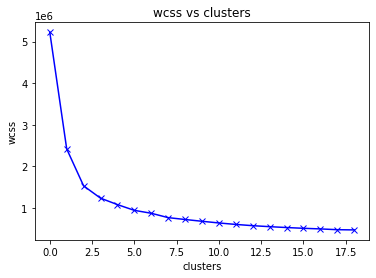

In [107]:
plt.plot(score,"bx-")
plt.title("wcss vs clusters")
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

In [112]:
kmeans = KMeans(4)
kmeans.fit(x)
labels=kmeans.labels_
kmeans.cluster_centers_.shape

(4, 35)

In [130]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
cluster_centers

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,3.337223e-01,0.007001,2.788798e-01,1.575263e-01,-2.636780e-16,-9.575674e-16,1.050175e-02,2.137179e-15,3.382711e-17,-1.637579e-15,...,3.678180,0.543991,1.459090,0.308121,0.506838,0.688098,16.798133,0.701202,0.288436,0.010408
1,1.342282e-03,0.006711,-1.360023e-15,-1.595946e-16,6.442953e-02,3.771812e-01,5.369128e-03,5.275168e-01,4.026846e-03,1.342282e-02,...,3.656779,0.487208,1.502416,0.305960,0.410537,0.883624,20.386577,0.655154,0.332121,0.012564
2,3.469447e-16,0.003425,6.522560e-16,2.428613e-16,9.828767e-01,1.027397e-02,-5.273559e-16,3.885781e-16,3.424658e-03,-4.163336e-16,...,4.011027,0.463493,1.433767,0.306644,0.402534,0.747603,19.291096,0.646336,0.345411,0.008322
3,1.921230e-03,0.005764,7.684918e-02,6.036838e-16,-8.743006e-16,-9.992007e-16,4.438040e-01,1.248799e-02,9.606148e-04,4.572526e-01,...,3.440451,0.526868,1.479577,0.333718,0.472786,0.802498,22.275696,0.688982,0.299116,0.011912


In [136]:
clustereddata = cluster_centers.loc[:,19:]
clustereddata.columns = fighter_similarity.columns[19:]
clustereddata['clusters'] = clustereddata.index
clustereddata

,age,Ht(cm),Wt(lbs),Reach (cm),sigstrikes_landed_permin,strike_acc,sigstrikes_abs_permin,sigstrikes_def,takedown_avg_per15min,takedown_acc,takedown_def,avg_sub_per15min,total_matches,Win%,Loss%,Draw%,clusters
0,33.620419,169.502274,134.028005,173.164845,3.082765,0.419032,3.678180,0.543991,1.459090,0.308121,0.506838,0.688098,16.798133,0.701202,0.288436,0.010408,0
1,38.216398,184.321883,194.609396,191.525378,2.520188,0.427705,3.656779,0.487208,1.502416,0.305960,0.410537,0.883624,20.386577,0.655154,0.332121,0.012564,1
2,40.366509,189.345694,252.952055,195.733959,2.692877,0.431233,4.011027,0.463493,1.433767,0.306644,0.402534,0.747603,19.291096,0.646336,0.345411,0.008322,2
3,36.642079,178.701625,161.143132,184.081165,2.749568,0.412325,3.440451,0.526868,1.479577,0.333718,0.472786,0.802498,22.275696,0.688982,0.299116,0.011912,3


KeyError: 'clusters'

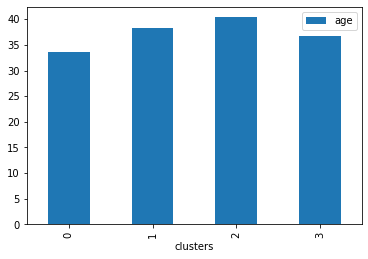

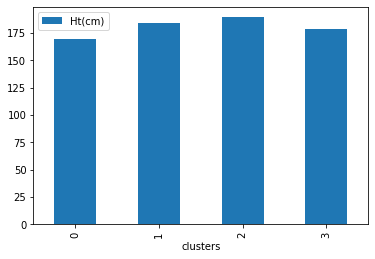

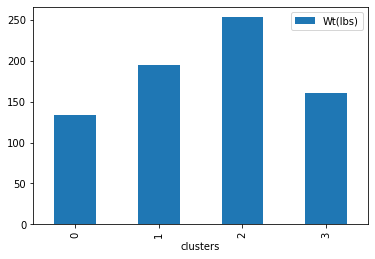

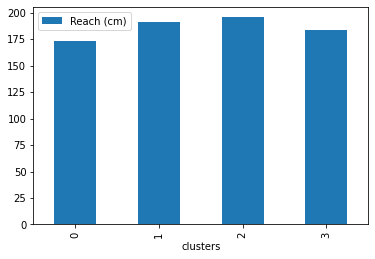

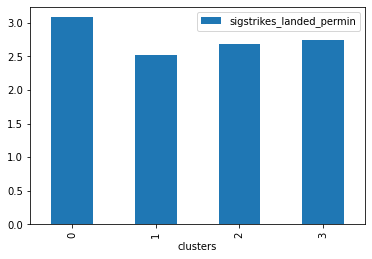

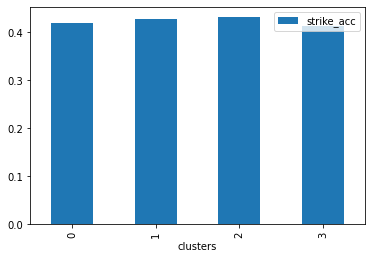

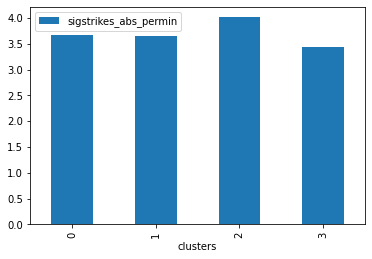

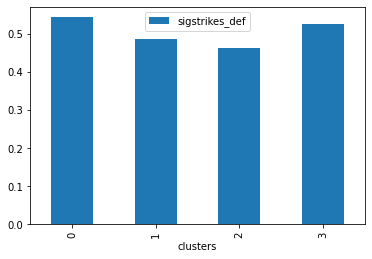

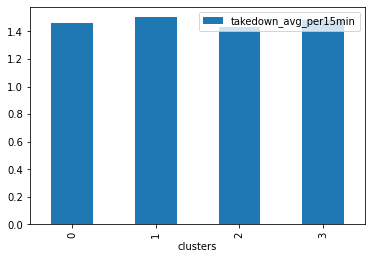

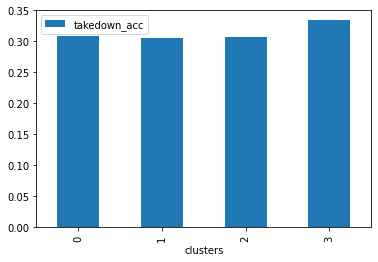

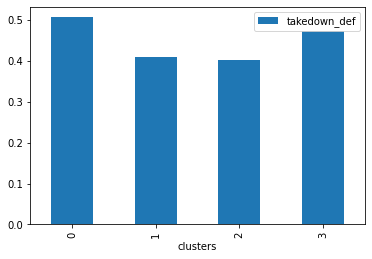

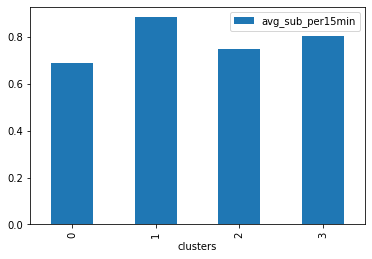

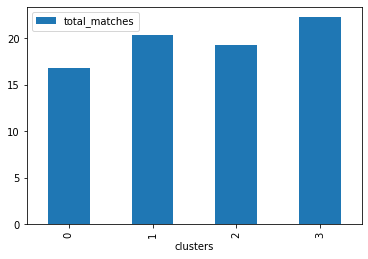

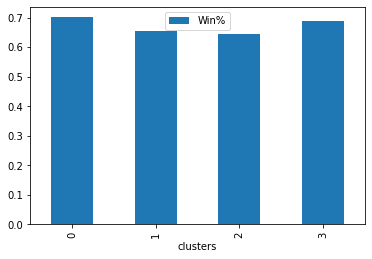

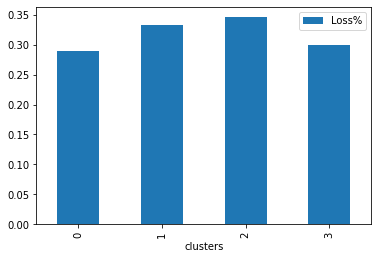

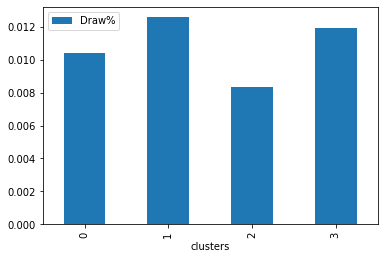

In [137]:
for i in clustereddata.columns[0:len(clustereddata.columns)]:
    clustereddata.plot.bar(x='clusters', y= i)

In [147]:
fighters_sig.groupby('weight_class')[['sigstrikes_landed_permin']].mean()

,sigstrikes_landed_permin
weight_class,
Bantamweight,2.812595
Catch Weight,3.898333
Featherweight,3.023323
Flyweight,2.867185
Heavyweight,2.543254
Light Heavyweight,2.626655
Lightweight,2.658253
Middleweight,2.556823
Open Weight,1.794000


In [197]:
fighters_sig.weight_class.value_counts()

Welterweight             486
Lightweight              475
Middleweight             406
Heavyweight              335
Featherweight            319
Bantamweight             289
Light Heavyweight        284
Flyweight                135
Women's Strawweight       68
Women's Flyweight         59
Women's Bantamweight      50
Catch Weight              18
Women's Featherweight      6
Open Weight                5
Name: weight_class, dtype: int64

In [155]:
# Conducting independent two sample t-test to see if featherweights strikes are significantly more than lightweights.
# first collect random data points for both samples
sample_light = fighters_sig[fighters_sig['weight_class']=='Lightweight']['sigstrikes_landed_permin'].sample(n=200)
sample_fea = fighters_sig[fighters_sig['weight_class']=='Featherweight']['sigstrikes_landed_permin'].sample(n=200)


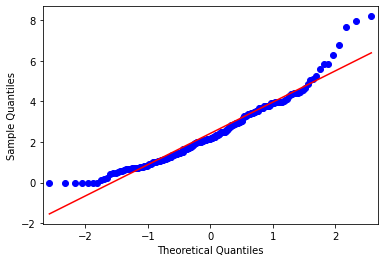

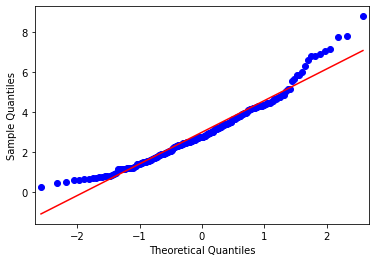

In [156]:
# normality test
from statsmodels.graphics.gofplots import qqplot
qqplot(sample_light, line='s')
plt.show()
qqplot(sample_fea, line='s')
plt.show()
# small deviations are due to the small data samples. Otherwise most points do fit the gaussian criteria

In [157]:
# checking homgeinity of variance
import scipy.stats as stats
stats.levene(sample_fea, sample_light, center='mean')
# p value > 0.05 failing to reject the null hypothesis, which means the samples has equal variance

LeveneResult(statistic=0.05793469361583045, pvalue=0.809914468661473)

In [158]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(sample_fea, sample_light,equal_var=True)
print('t=%.3f, p=%.3f ' % (stat, p))
# p value less than 0.05 where we reject the null hypothesis which means featherweights have landed more significant strikes than lightweights

t=3.556, p=0.000 
